# Анализ товарного ассортимента магазина

## Описание проекта

### Аналитическая задача

Провести анализ товарного ассортимента и определить какие товары входят в основной и дополнительный ассортимент.

Дополнительный ассортимент -- товары, которые можно предлагать как сопутствующие или располагать в прикассовой зоне.

### Описание данных
|Признак | Комментарий|
|--:|:--|
|`date` | дата заказа|
|`customer_id` | идентификатор покупателя|
|`order_id` | идентификатор заказа|
|`product` | наименование товара|
|`quantity` | количество товара в заказе|
|`price` | цена товара|

Примерная последовательность выполнения работ

Шаг 1. Загрузка данных
- Загрузка данных и предварительный анализ

Шаг 2. Подготовка данных (при необходимости)
- Корректировка заголовков;
- Корректировка типов признаков;
- Поиск дублей, аномальных и пропущенных значений;
- Добавление новых столбцов.

Шаг 3. Исследовательский анализ данных
- Построить диаграмму количества покупок по дням;
- Построить диаграмму, отображающую сумму покупок по дням;
- Построить гистограмму, отображающую распределение заказов по сумме.

Шаг 4. Анализ торгового асортимента
- На основании наименования товара и данных открытых внешних источников предложить 3-10 категорий товаров;
- В каждой категории распределить товары на основной и дополнительный ассортимент.

Шаг 5. Статистические гипотезы
- Сформулировать и проверить статистические гипотезы о равенстве средних чеков для выделенных категорий товаров.

# Подключение библиотек

In [154]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

from scipy.stats import pearsonr, spearmanr, kendalltau, pointbiserialr

from scipy.stats import (shapiro, kstest,
                         ks_2samp, anderson,
                         jarque_bera,
                         ttest_ind,
                         mannwhitneyu,
                         kruskal)

from sklearn.preprocessing import LabelEncoder
import warnings

# Загрузка данных и предварительный анализ

In [155]:
df_start = pd.read_csv('vkr_project_retail.csv')

In [156]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [157]:
df_start.head(10)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


In [158]:
df_start.columns

Index(['date', 'customer_id', 'order_id', 'product', 'quantity', 'price'], dtype='object')

In [159]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [160]:
perc = [0.01, 0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99]
df_start.describe(percentiles=perc)

,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
1%,2.018100e+09,14498.000000,1.000000,15.000000
5%,2.018102e+09,14553.800000,1.000000,38.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
90%,2.019081e+09,72052.400000,3.000000,1162.000000


## Выводы по предварительному анализу данных

|признак|комментарий|
|--:|:--|
|`quantity`|~~имеются аномальные значения, возможно оптовые закупки~~|
|`price `|~~большинство товаров дешевые, но есть дорогие позиции~~|
|`date `|~~скорректировать тип данных~~|
||~~добавить признаки `доход`(revenue) для дальнейшего анализа~~|
|`date `|~~на базе данного признака сделать новые - день, месяц и год для дальнейшего анализа~~|

# Подготовка данных


## Корректировка типов признаков

In [161]:
df_start['date'] = pd.to_datetime(df_start['date'], format = '%Y%m%d%H')

### Вывод: 
- скоректирован тип данных признака дата `date`

## Поиск дублей, аномальных и пропущенных значений

In [162]:
df_start.head(10)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


In [163]:
df_start.isnull().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

In [164]:
df_start.duplicated().sum()

np.int64(0)

In [165]:
# Проверим датафрейм на наличие аномальных заказов,
#  где у одного заказа есть несколько покупателей
anomalies = (
        df_start.groupby('order_id')['customer_id']
        .nunique()
        .reset_index()
    )
anomalies = anomalies[anomalies['customer_id'] > 1]

anomalies_lst=anomalies['order_id'].tolist()
anomalies_lst

[14872,
 68785,
 69283,
 69310,
 69345,
 69410,
 69485,
 69531,
 69833,
 70114,
 70542,
 70631,
 70726,
 70808,
 70903,
 70946,
 71054,
 71226,
 71461,
 71480,
 71542,
 71571,
 71648,
 71663,
 72188,
 72778,
 72790,
 72845,
 72950]

In [166]:
df = df_start[~df_start['order_id'].isin(anomalies_lst)]

In [167]:
# Аномалии в ценах и количестве
print("Записи с отрицательной или нулевой ценой:")
print(df[df['price'] <= 0])
print("\nЗаписи с отрицательным или нулевым количеством:")
print(df[df['quantity'] <= 0])

Записи с отрицательной или нулевой ценой:
Empty DataFrame
Columns: [date, customer_id, order_id, product, quantity, price]
Index: []

Записи с отрицательным или нулевым количеством:
Empty DataFrame
Columns: [date, customer_id, order_id, product, quantity, price]
Index: []


In [168]:
# Проверим, чтобы даты не были из будущего или слишком давнего прошлого
print("Минимальная дата в данных:", df['date'].min())
print("Максимальная дата в данных:", df['date'].max())

Минимальная дата в данных: 2018-10-01 00:00:00
Максимальная дата в данных: 2019-10-31 16:00:00


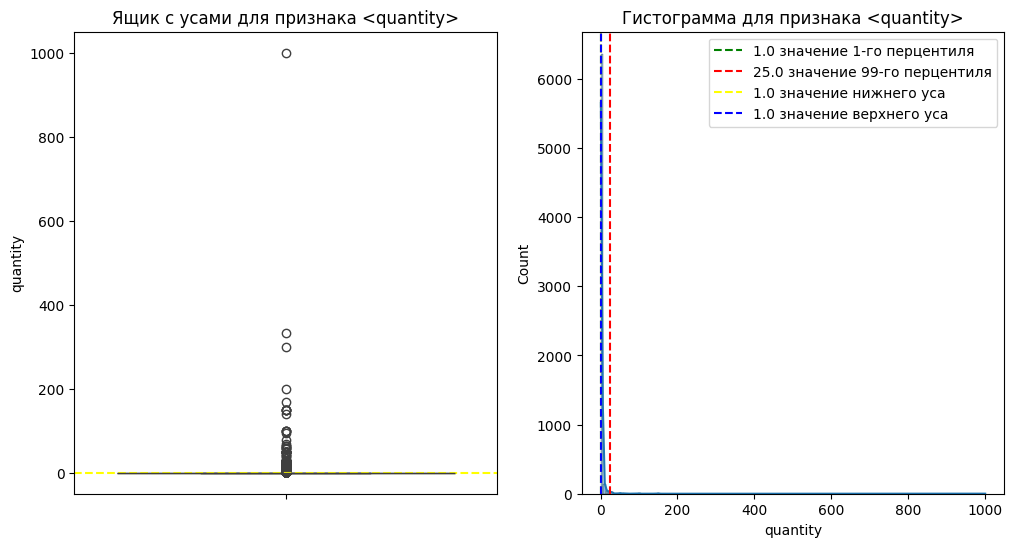

In [169]:
plt.subplots(1,2, figsize=(12,6))
plt.subplot(1,2, 1)
ax_1 = sns.boxplot(data=df,
                   y='quantity');
plt.title('Ящик с усами для признака <quantity>')
q_25, low_wish = ax_1.lines[0].get_ydata()
q_75, hi_wish = ax_1.lines[1].get_ydata()
ax_1.axhline(low_wish,
             color='yellow',
             linestyle='--',
             label=f'{np.round(low_wish,1)} значение нижнего уса')


# 1 - гистограмма
plt.subplot(1,2, 2)
ax_2 = sns.histplot(df['quantity'],
                    kde=True);
plt.title('Гистограмма для признака <quantity>')
per_1 = np.nanpercentile(df['quantity'], 1)
per_99 = np.nanpercentile(df['quantity'], 99)
# расчет и визуализация перцентилей
ax_2.axvline(per_1,
             color='green',
             linestyle='--',
             label=f'{np.round(per_1,1)} значение 1-го перцентиля')
ax_2.axvline(per_99,
             color='red',
             linestyle='--',
             label=f'{np.round(per_99,1)} значение 99-го перцентиля')
# расчет и визуализация усов
q_25, low_wish = ax_1.lines[0].get_ydata()
q_75, hi_wish = ax_1.lines[1].get_ydata()
ax_2.axvline(low_wish,
             color='yellow',
             linestyle='--',
             label=f'{np.round(low_wish,1)} значение нижнего уса')

ax_2.axvline(hi_wish,
             color='blue',
             linestyle='--',
             label=f'{np.round(hi_wish,1)} значение верхнего уса')
plt.legend()

In [170]:
percentiles = df['quantity'].quantile([0.01, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("\nТочные перцентили:")
for p, val in percentiles.items():
    print(f"{p*100:.0f}%: {val:.2f} шт.")


Точные перцентили:
1%: 1.00 шт.
25%: 1.00 шт.
50%: 1.00 шт.
75%: 1.00 шт.
90%: 3.00 шт.
95%: 6.00 шт.
99%: 25.00 шт.


In [171]:
print("Детальный анализ распределения:")
print(f"Позиций с 1 товаром: {(df['quantity'] == 1).sum()} ({((df['quantity'] == 1).sum()/len(df))*100:.1f}%)")
print(f"Позиций с 2+ товарами: {(df['quantity'] > 1).sum()} ({((df['quantity'] > 1).sum()/len(df))*100:.1f}%)")

Детальный анализ распределения:
Позиций с 1 товаром: 5440 (81.8%)
Позиций с 2+ товарами: 1208 (18.2%)


In [172]:
# 1. Создаем признак для оптовых покупок
df['wholesale_flag'] = df['quantity'] > df['quantity'].quantile(0.95)



C:\Users\Администратор\AppData\Local\Temp\ipykernel_15252\496106372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wholesale_flag'] = df['quantity'] > df['quantity'].quantile(0.95)


In [173]:
df.head()

,date,customer_id,order_id,product,quantity,price,wholesale_flag
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,False
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,False
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,False
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,False
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,False


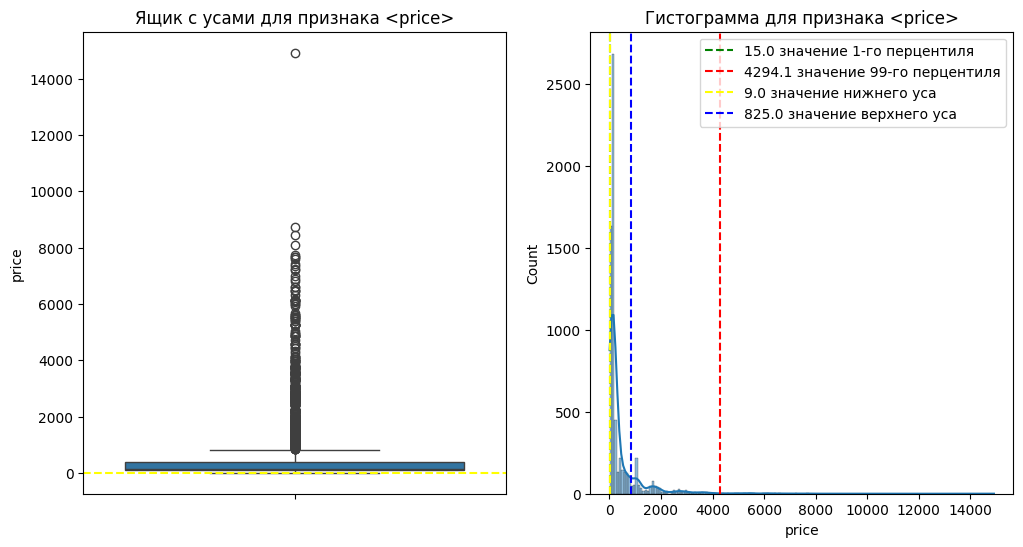

In [174]:
plt.subplots(1,2, figsize=(12,6))
plt.subplot(1,2, 1)
ax_1 = sns.boxplot(data=df,
                   y='price');
plt.title('Ящик с усами для признака <price>')
q_25, low_wish = ax_1.lines[0].get_ydata()
q_75, hi_wish = ax_1.lines[1].get_ydata()
ax_1.axhline(low_wish,
             color='yellow',
             linestyle='--',
             label=f'{np.round(low_wish,1)} значение нижнего уса')


# 1 - гистограмма
plt.subplot(1,2, 2)
ax_2 = sns.histplot(df['price'],
                    kde=True);
plt.title('Гистограмма для признака <price>')
per_1 = np.nanpercentile(df['price'], 1)
per_99 = np.nanpercentile(df['price'], 99)
# расчет и визуализация перцентилей
ax_2.axvline(per_1,
             color='green',
             linestyle='--',
             label=f'{np.round(per_1,1)} значение 1-го перцентиля')
ax_2.axvline(per_99,
             color='red',
             linestyle='--',
             label=f'{np.round(per_99,1)} значение 99-го перцентиля')
# расчет и визуализация усов
q_25, low_wish = ax_1.lines[0].get_ydata()
q_75, hi_wish = ax_1.lines[1].get_ydata()
ax_2.axvline(low_wish,
             color='yellow',
             linestyle='--',
             label=f'{np.round(low_wish,1)} значение нижнего уса')

ax_2.axvline(hi_wish,
             color='blue',
             linestyle='--',
             label=f'{np.round(hi_wish,1)} значение верхнего уса')
plt.legend()

In [175]:
# Проверяем самые дорогие товары
expensive_items = df[df['price'] > df['price'].quantile(0.99)]  # >4225 руб
print("Самые дорогие товары (верхние 1%):")
print(expensive_items[['product', 'price', 'quantity']].sort_values('price', ascending=False).head(10))

# Проверяем самые дешевые товары (возможные ошибки)
cheap_items = df[df['price'] < df['price'].quantile(0.01)]  # <15 руб
print("\nСамые дешевые товары (нижние 1%):")
print(cheap_items[['product', 'price', 'quantity']].sort_values('price').head(10))

Самые дорогие товары (верхние 1%):
                                                product    price  quantity
5992  Сушилка уличная Leifheit 85210 LINOMATIC V 400...  14917.0         1
2697  Сумка-тележка хозяйственная Andersen Royal Sho...   8737.0         1
1981  Сумка-тележка хозяйственная Andersen Alu Star ...   8437.0         1
2997  Сумка-тележка хозяйственная Rolser MNB019 rojo...   8077.0         1
6629  Стремянка 7 ступенчатая Hailo 8040-707 XXL 13 ...   7724.0         1
2339  Сумка-тележка хозяйственная Rolser IMX006 bass...   7679.0         1
5994  Сумка-тележка хозяйственная Rolser MNB017 fucs...   7679.0         1
654   Сумка-тележка хозяйственная Rolser MOU041 malv...   7597.0         1
1241  Гладильная доска Leifheit AirBoard Compact M P...   7424.0         1
6169  Урна уличная стальная Сальвадор 02.021.0 46х11...   7349.0         1

Самые дешевые товары (нижние 1%):
                                                product  price  quantity
2159                Горох Амброз

In [176]:
# 2. Создаем ценовые сегменты
df['price_segment'] = pd.cut(df['price'],
                            bins=[0, 15, 100, 500, 2000, 4225, np.inf],
                            labels=['<15р', '15-100р', '100-500р', '500-2000р', '2000-4225р', '>4225р'])


C:\Users\Администратор\AppData\Local\Temp\ipykernel_15252\587525373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_segment'] = pd.cut(df['price'],


### Выводы:
- На этапе первичной обработки данных пропущенных значений и дублирующихся записей не найдено;
- Обнаружено 29 аномальных заказа, в которых количество покупателей более 1, создан датафрейм без этих заказов;
- Признак (количество) `quantity`: позиций с 1 товаром: 5504 (81.7%) - покупатели в основном берут по 1 товару. Имеются аномальные значения. Проанализировав boxplot и перцентили, решаю выделить бинарный признак (опт) `wholesale_flag` по 95 перцентилю равным 6 штукам.
- Признак (цена) `price`: много дешевых товаров, а также есть дорогие (аномальные значения). Проверил самые дешевые (цена < 15 рублей)и самые дорогие (цена > 4225 рублей) на возможные ошибки, ошибок не найдено. Проанализировав boxplot, решаю создать ценовые сегменты `price_segment` для дальнейшего анализа.

## Добавление новых столбцов

In [177]:

df['revenue'] = df['quantity'] * df['price']

df['date_only'] = df['date'].dt.date


df[['date', 'date_only', 'quantity', 'price', 'revenue']].head()

C:\Users\Администратор\AppData\Local\Temp\ipykernel_15252\209493058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'] = df['quantity'] * df['price']
C:\Users\Администратор\AppData\Local\Temp\ipykernel_15252\209493058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_only'] = df['date'].dt.date


,date,date_only,quantity,price,revenue
0,2018-10-01,2018-10-01,1,142.0,142.0
1,2018-10-01,2018-10-01,1,194.0,194.0
2,2018-10-01,2018-10-01,1,112.0,112.0
3,2018-10-01,2018-10-01,1,179.0,179.0
4,2018-10-01,2018-10-01,1,112.0,112.0


### Выводы:
добавил столбцы:
- `revenue` с общей выручкой по строке (цена * количество);
- `date_only` создаю столбец с датой без времени

In [178]:
df.head()

,date,customer_id,order_id,product,quantity,price,wholesale_flag,price_segment,revenue,date_only
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,False,100-500р,142.0,2018-10-01
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,False,100-500р,194.0,2018-10-01
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,False,100-500р,112.0,2018-10-01
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,False,100-500р,179.0,2018-10-01
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,False,100-500р,112.0,2018-10-01


# Исследовательский анализ данных (EDA)

In [179]:
print("БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ:")
print(f"Уникальных заказов: {df['order_id'].nunique():,}")
print(f"Уникальных клиентов: {df['customer_id'].nunique():,}")
print(f"Уникальных товаров: {df['product'].nunique():,}")
print(f"Период данных: от {df['date_only'].min()} до {df['date_only'].max()}")
print("\n" + "="*60)

БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ:
Уникальных заказов: 2,755
Уникальных клиентов: 2,394
Уникальных товаров: 2,331
Период данных: от 2018-10-01 до 2019-10-31



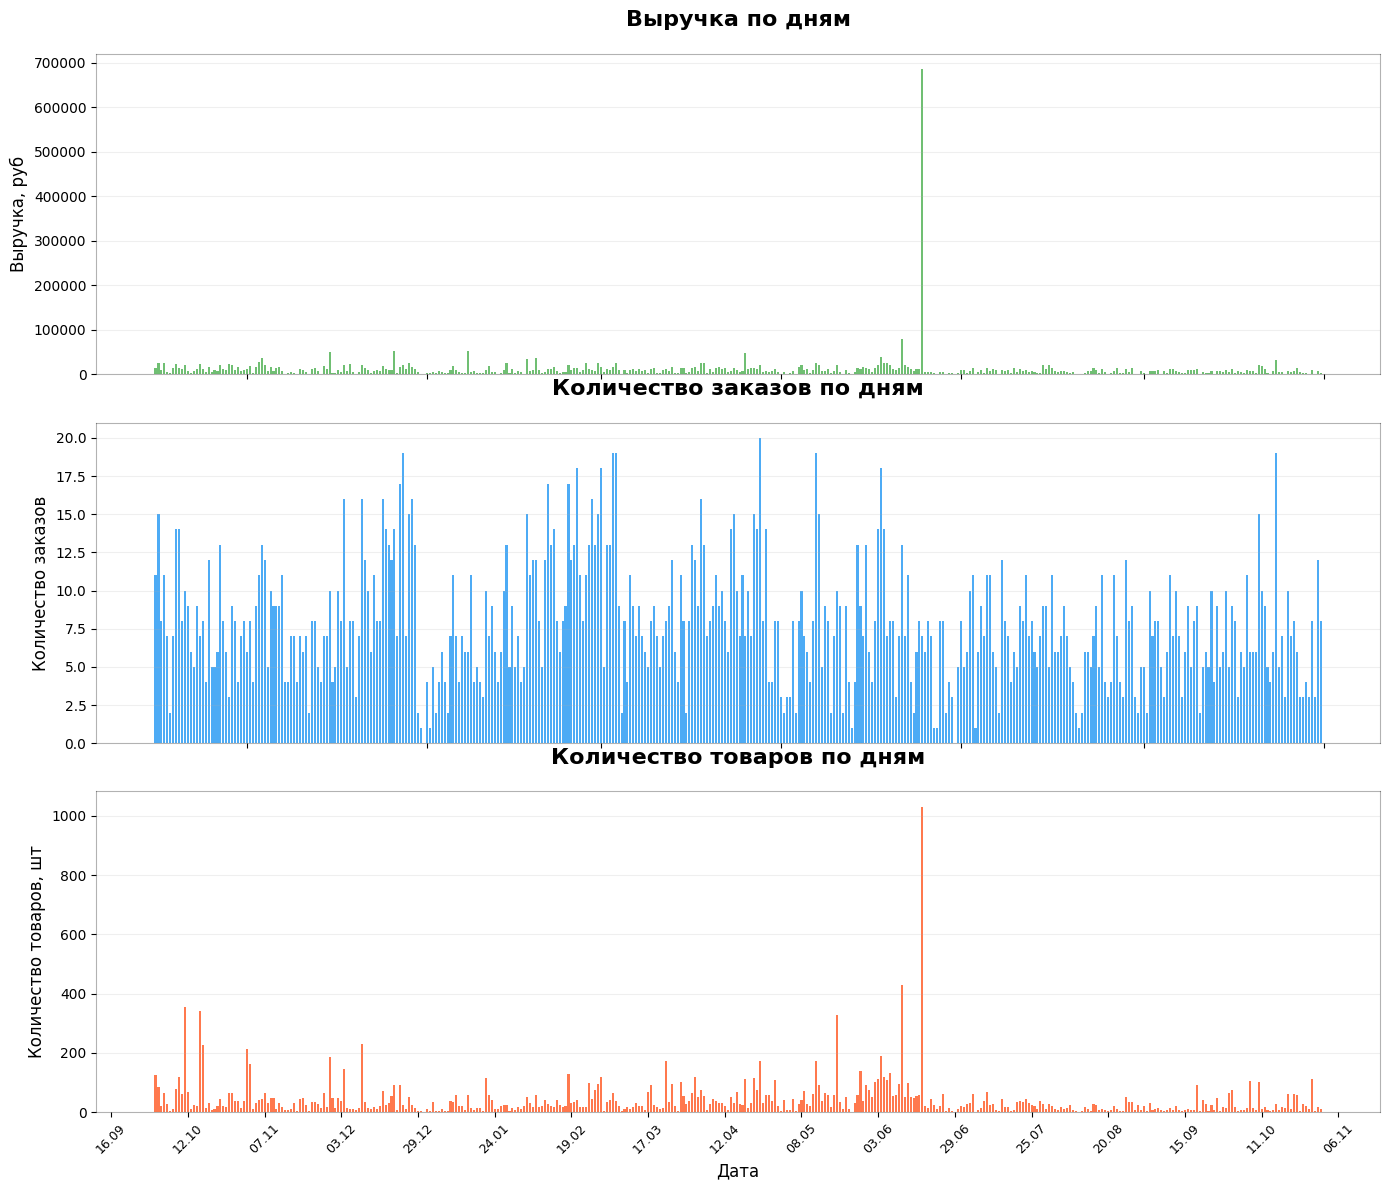

In [180]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))

# Форматирование для денежных значений
def ruble_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return f'{x:.0f}'

# 1. Первый график - Выручка по дням
daily_revenue = df.groupby('date_only')['revenue'].sum().reset_index()
bars1 = ax1.bar(daily_revenue['date_only'], daily_revenue['revenue'], 
               color='#4CAF50', alpha=0.8, width=0.7)
ax1.set_title('Выручка по дням', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Выручка, руб', fontsize=12)
ax1.tick_params(axis='x', labelbottom=False)  # Скрываем подписи

# 2. Количество заказов по дням
daily_orders = df.groupby('date_only')['order_id'].nunique().reset_index()
bars2 = ax2.bar(daily_orders['date_only'], daily_orders['order_id'], 
               color='#2196F3', alpha=0.8, width=0.7)
ax2.set_title('Количество заказов по дням', fontsize=16, fontweight='bold', pad=20)
ax2.set_ylabel('Количество заказов', fontsize=12)
ax2.tick_params(axis='x', labelbottom=False)  # Скрываем подписи

# 3. Количество товаров по дням
daily_products = df.groupby('date_only')['quantity'].sum().reset_index()
bars3 = ax3.bar(daily_products['date_only'], daily_products['quantity'], 
               color='#FF5722', alpha=0.8, width=0.7)
ax3.set_title('Количество товаров по дням', fontsize=16, fontweight='bold', pad=20)
ax3.set_xlabel('Дата', fontsize=12)
ax3.set_ylabel('Количество товаров, шт', fontsize=12)


days_count = len(daily_revenue)
interval = max(1, days_count // 15)  # Автоматический интервал

ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax3.tick_params(axis='x', rotation=45, labelsize=9)


for ax in [ax1, ax2, ax3]:
    ax.grid(axis='y', alpha=0.2)
    for spine in ax.spines.values():
        spine.set_alpha(0.3)



plt.tight_layout()
plt.subplots_adjust(hspace=0.15)
plt.show()


ДЕТАЛЬНАЯ СТАТИСТИКА ПО ДНЯМ:
            заказов  уникальных_клиентов  выручка_сумма  выручка_средняя  \
date_only                                                                  
2018-10-01       11                   11        13934.0           696.70   
2018-10-02       15                   12        26643.0           619.60   
2018-10-03        8                    7        10574.0           961.27   
2018-10-04       11                   10        26579.0           949.25   
2018-10-05        7                    7         4720.0           337.14   
...             ...                  ...            ...              ...   
2019-10-27        3                    3          998.0           199.60   
2019-10-28        8                    8         9072.0           907.20   
2019-10-29        3                    2          642.0           214.00   
2019-10-30       12                   11         7809.0           650.75   
2019-10-31        8                    7         4367.0   

C:\Users\Администратор\AppData\Local\Temp\ipykernel_15252\3189020272.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['date'].dt.day_name()
C:\Users\Администратор\AppData\Local\Temp\ipykernel_15252\3189020272.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_weekend'] = df['date'].dt.dayofweek >= 5


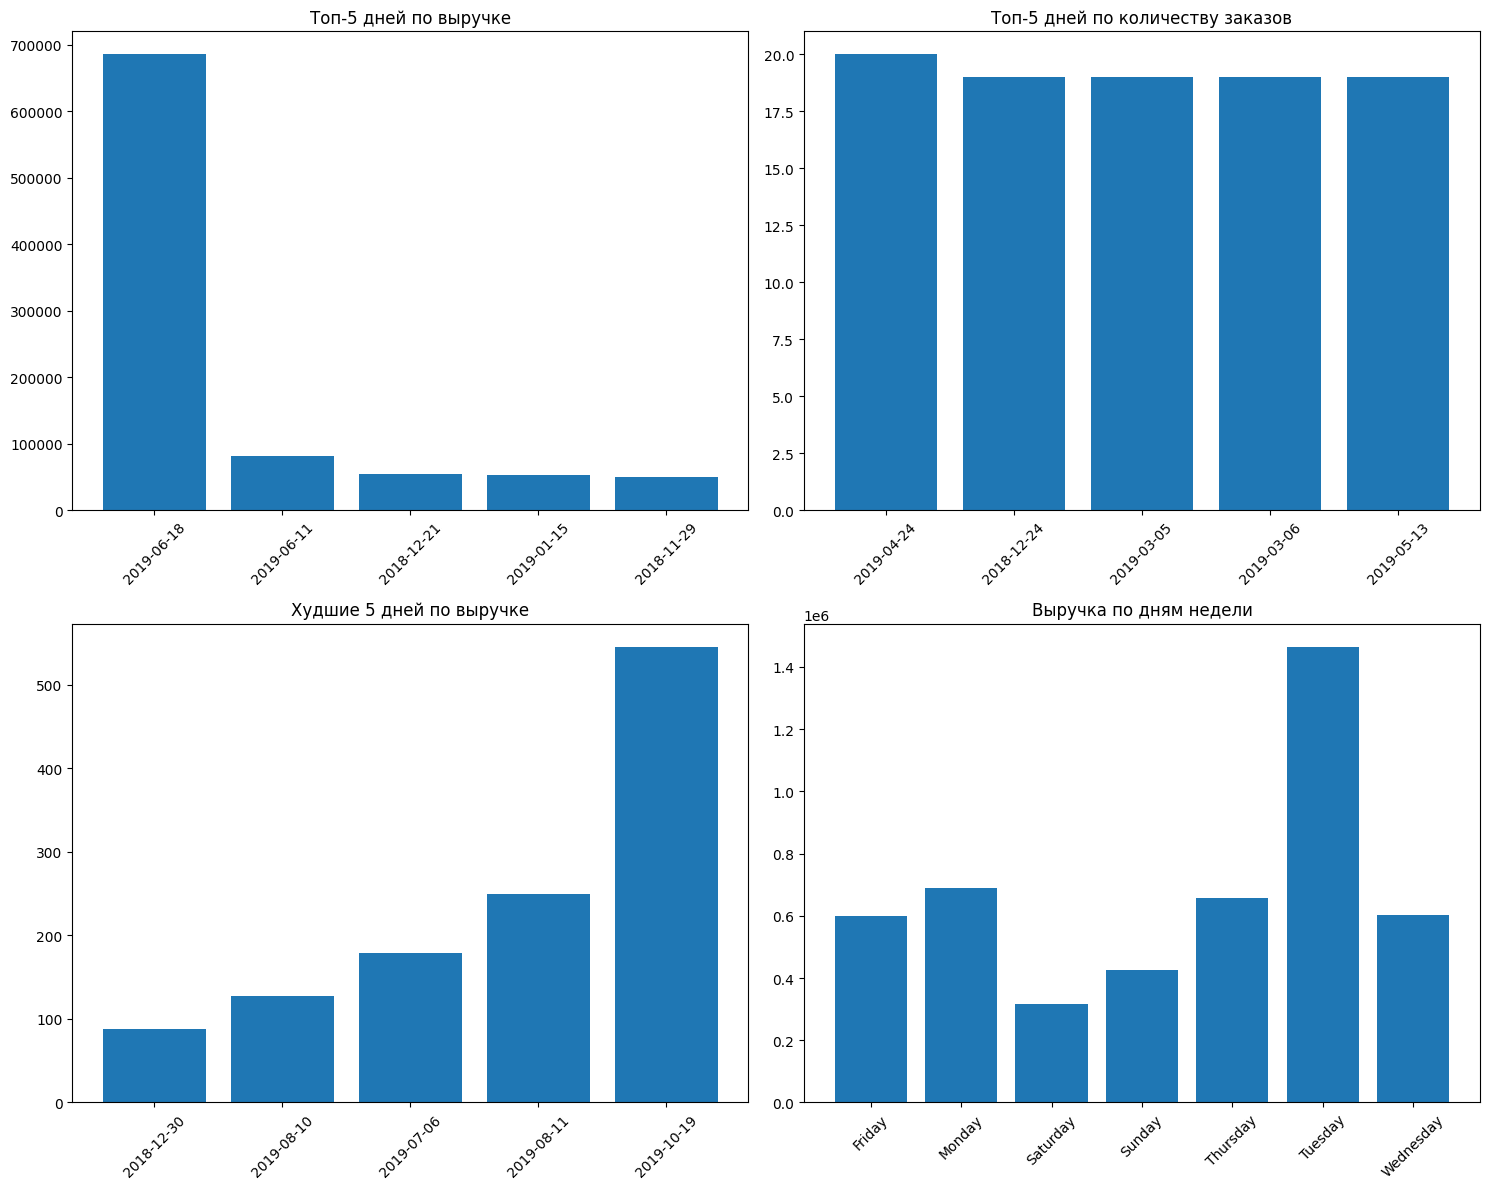

In [181]:
# Считаем ключевые метрики по дням
daily_stats = df.groupby('date_only').agg({
    'order_id': 'nunique',
    'customer_id': 'nunique',
    'revenue': ['sum', 'mean', 'median'],
    'quantity': 'sum',
    'product': 'nunique'
}).round(2)

daily_stats.columns = ['заказов', 'уникальных_клиентов', 'выручка_сумма', 'выручка_средняя', 
                      'выручка_медиана', 'количество_товаров', 'уникальных_товаров']

print("ДЕТАЛЬНАЯ СТАТИСТИКА ПО ДНЯМ:")
print(daily_stats)
print("\n" + "="*60)

# Анализ лучших и худших дней по каждой метрике
metrics = ['заказов', 'уникальных_клиентов', 'выручка_сумма', 'выручка_средняя', 
           'количество_товаров', 'уникальных_товаров']

print("\nЛУЧШИЕ И ХУДШИЕ ДНИ ПО КЛЮЧЕВЫМ МЕТРИКАМ:")
print("="*60)

for metric in metrics:
    best_day = daily_stats[metric].idxmax()
    best_value = daily_stats[metric].max()
    worst_day = daily_stats[metric].idxmin()
    worst_value = daily_stats[metric].min()
    
    print(f"\n{metric.upper()}:")
    print(f"  Лучший день: {best_day} - {best_value}")
    print(f"  Худший день: {worst_day} - {worst_value}")
    print(f"  Разница: {best_value - worst_value:.2f} ({best_value/worst_value:.1f}x)")

# Дни с максимальной и минимальной выручкой
max_revenue_day = daily_stats['выручка_сумма'].idxmax()
min_revenue_day = daily_stats['выручка_сумма'].idxmin()

print("\n" + "="*60)
print("ДЕТАЛЬНЫЙ АНАЛИЗ ДНЯ С МАКСИМАЛЬНОЙ ВЫРУЧКОЙ:")
print(f"Дата: {max_revenue_day}")
print(daily_stats.loc[max_revenue_day])

print("\nДЕТАЛЬНЫЙ АНАЛИЗ ДНЯ С МИНИМАЛЬНОЙ ВЫРУЧКОЙ:")
print(f"Дата: {min_revenue_day}")
print(daily_stats.loc[min_revenue_day])

# Анализ дней недели
df['day_of_week'] = df['date'].dt.day_name()
df['is_weekend'] = df['date'].dt.dayofweek >= 5

weekday_stats = df.groupby('day_of_week').agg({
    'order_id': 'nunique',
    'revenue': 'sum',
    'customer_id': 'nunique'
}).round(2)

weekday_stats.columns = ['заказов', 'выручка', 'уникальных_клиентов']
weekday_stats['средний_чек'] = (weekday_stats['выручка'] / weekday_stats['заказов']).round(2)

print("\n" + "="*60)
print("СТАТИСТИКА ПО ДНЯМ НЕДЕЛИ:")
print(weekday_stats)

# Визуализация лучших/худших дней
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Топ-5 дней по выручке
top5_revenue = daily_stats.nlargest(5, 'выручка_сумма')
axes[0, 0].bar(top5_revenue.index.astype(str), top5_revenue['выручка_сумма'])
axes[0, 0].set_title('Топ-5 дней по выручке')
axes[0, 0].tick_params(axis='x', rotation=45)

# Топ-5 дней по количеству заказов
top5_orders = daily_stats.nlargest(5, 'заказов')
axes[0, 1].bar(top5_orders.index.astype(str), top5_orders['заказов'])
axes[0, 1].set_title('Топ-5 дней по количеству заказов')
axes[0, 1].tick_params(axis='x', rotation=45)

# Худшие 5 дней по выручке
bottom5_revenue = daily_stats.nsmallest(5, 'выручка_сумма')
axes[1, 0].bar(bottom5_revenue.index.astype(str), bottom5_revenue['выручка_сумма'])
axes[1, 0].set_title('Худшие 5 дней по выручке')
axes[1, 0].tick_params(axis='x', rotation=45)

# Выручка по дням недели
axes[1, 1].bar(weekday_stats.index, weekday_stats['выручка'])
axes[1, 1].set_title('Выручка по дням недели')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [182]:
segment_analysis = df.groupby('price_segment').agg({
    'order_id': 'nunique',
    'revenue': 'sum',
    'quantity': 'sum',
    'product': 'nunique'
}).rename(columns={
    'order_id': 'количество_заказов',
    'product': 'уникальных_товаров'
})

segment_analysis['доля_выручки_%'] = (segment_analysis['revenue'] / segment_analysis['revenue'].sum() * 100).round(1)
segment_analysis['средний_чек'] = (segment_analysis['revenue'] / segment_analysis['количество_заказов']).round(0)

print("АНАЛИЗ ПО ЦЕНОВЫМ СЕГМЕНТАМ:")
print(segment_analysis)
print("\n" + "="*60)

АНАЛИЗ ПО ЦЕНОВЫМ СЕГМЕНТАМ:
               количество_заказов    revenue  quantity  уникальных_товаров  \
price_segment                                                                
<15р                           20     1310.0       102                  45   
15-100р                       588   371350.0      7815                 609   
100-500р                     1188  1066202.0      5784                1008   
500-2000р                     897  2189896.0      2458                 527   
2000-4225р                    193   690427.0       236                 124   
>4225р                         64   438417.0        74                  50   

               доля_выручки_%  средний_чек  
price_segment                               
<15р                      0.0         66.0  
15-100р                   7.8        632.0  
100-500р                 22.4        897.0  
500-2000р                46.0       2441.0  
2000-4225р               14.5       3577.0  
>4225р                    9.2  

C:\Users\Администратор\AppData\Local\Temp\ipykernel_15252\1351579132.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = df.groupby('price_segment').agg({


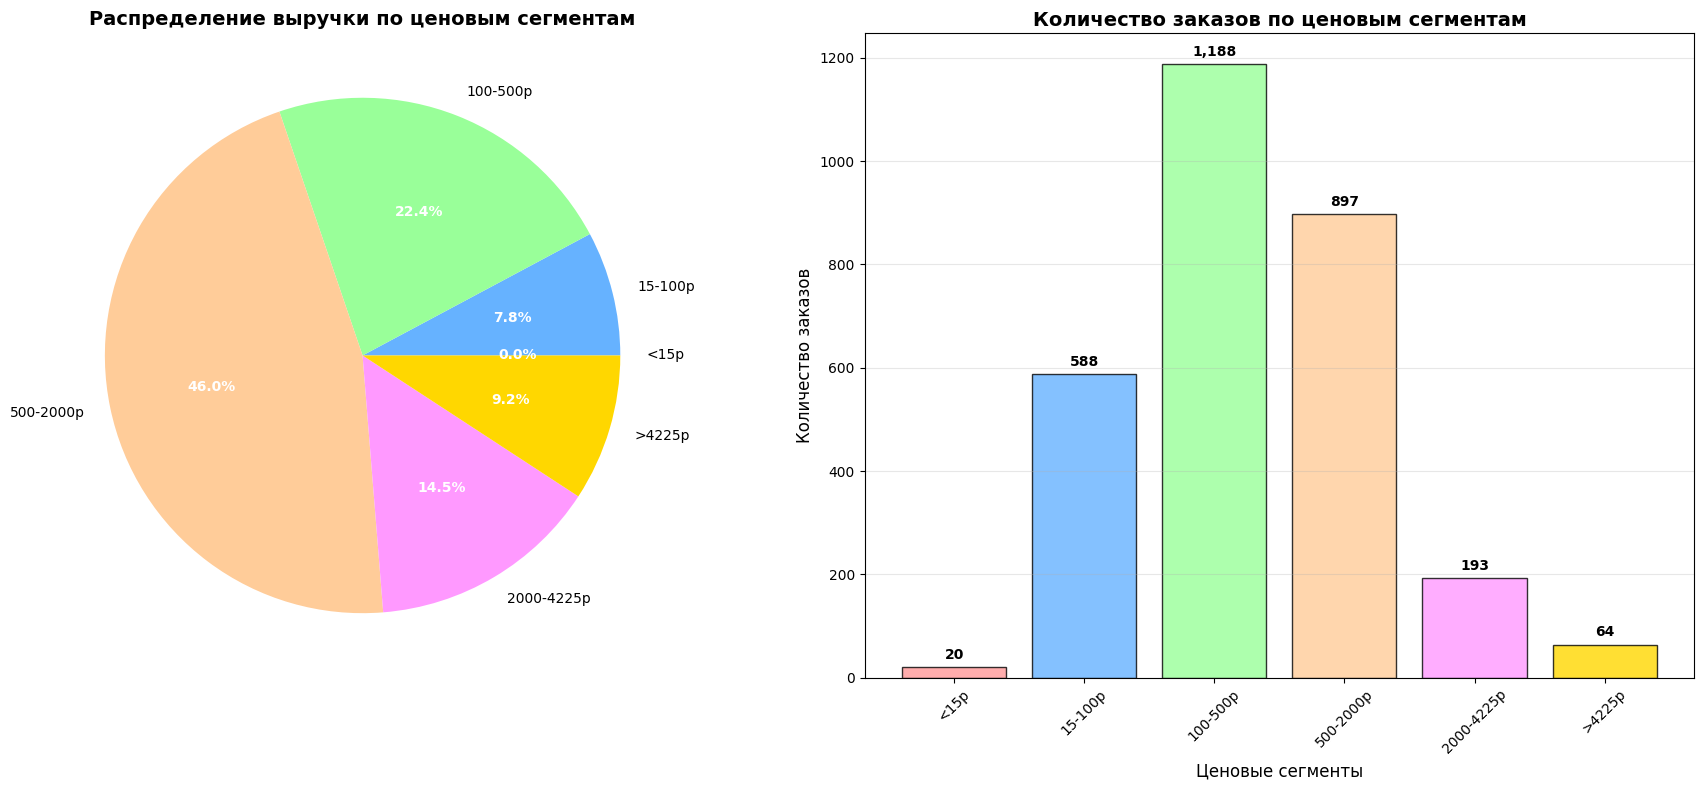

In [183]:
plt.figure(figsize=(18, 8))

# Доля выручки по сегментам
plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie(segment_analysis['доля_выручки_%'], 
                                   labels=segment_analysis.index, 
                                   autopct='%1.1f%%',
                                   colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99FF', '#FFD700'])
plt.title('Распределение выручки по ценовым сегментам', fontsize=14, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# Количество заказов по сегментам
plt.subplot(1, 2, 2)
bars = plt.bar(segment_analysis.index, segment_analysis['количество_заказов'],
               color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99FF', '#FFD700'],
               alpha=0.8, edgecolor='black')
plt.title('Количество заказов по ценовым сегментам', fontsize=14, fontweight='bold')
plt.xlabel('Ценовые сегменты', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{int(height):,}', 
             ha='center', va='bottom', 
             fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

In [184]:
wholesale_analysis = df.groupby('wholesale_flag').agg({
    'order_id': 'nunique',
    'revenue': ['sum', 'mean'],
    'quantity': ['sum', 'mean'],
    'customer_id': 'nunique'
})

wholesale_analysis.columns = ['заказов', 'выручка_общая', 'выручка_средняя', 
                             'товаров_всего', 'товаров_среднее', 'уникальных_клиентов']

wholesale_analysis['доля_выручки_%'] = (wholesale_analysis['выручка_общая'] / wholesale_analysis['выручка_общая'].sum() * 100).round(1)

print("АНАЛИЗ ОПТОВЫХ ПОКУПОК:")
print(wholesale_analysis)
print("\n" + "="*60)

АНАЛИЗ ОПТОВЫХ ПОКУПОК:
                заказов  выручка_общая  выручка_средняя  товаров_всего  \
wholesale_flag                                                           
False              2540      3355003.0       528.846627           8024   
True                240      1402599.0      4613.812500           8445   

                товаров_среднее  уникальных_клиентов  доля_выручки_%  
wholesale_flag                                                        
False                  1.264817                 2220            70.5  
True                  27.779605                  209            29.5  



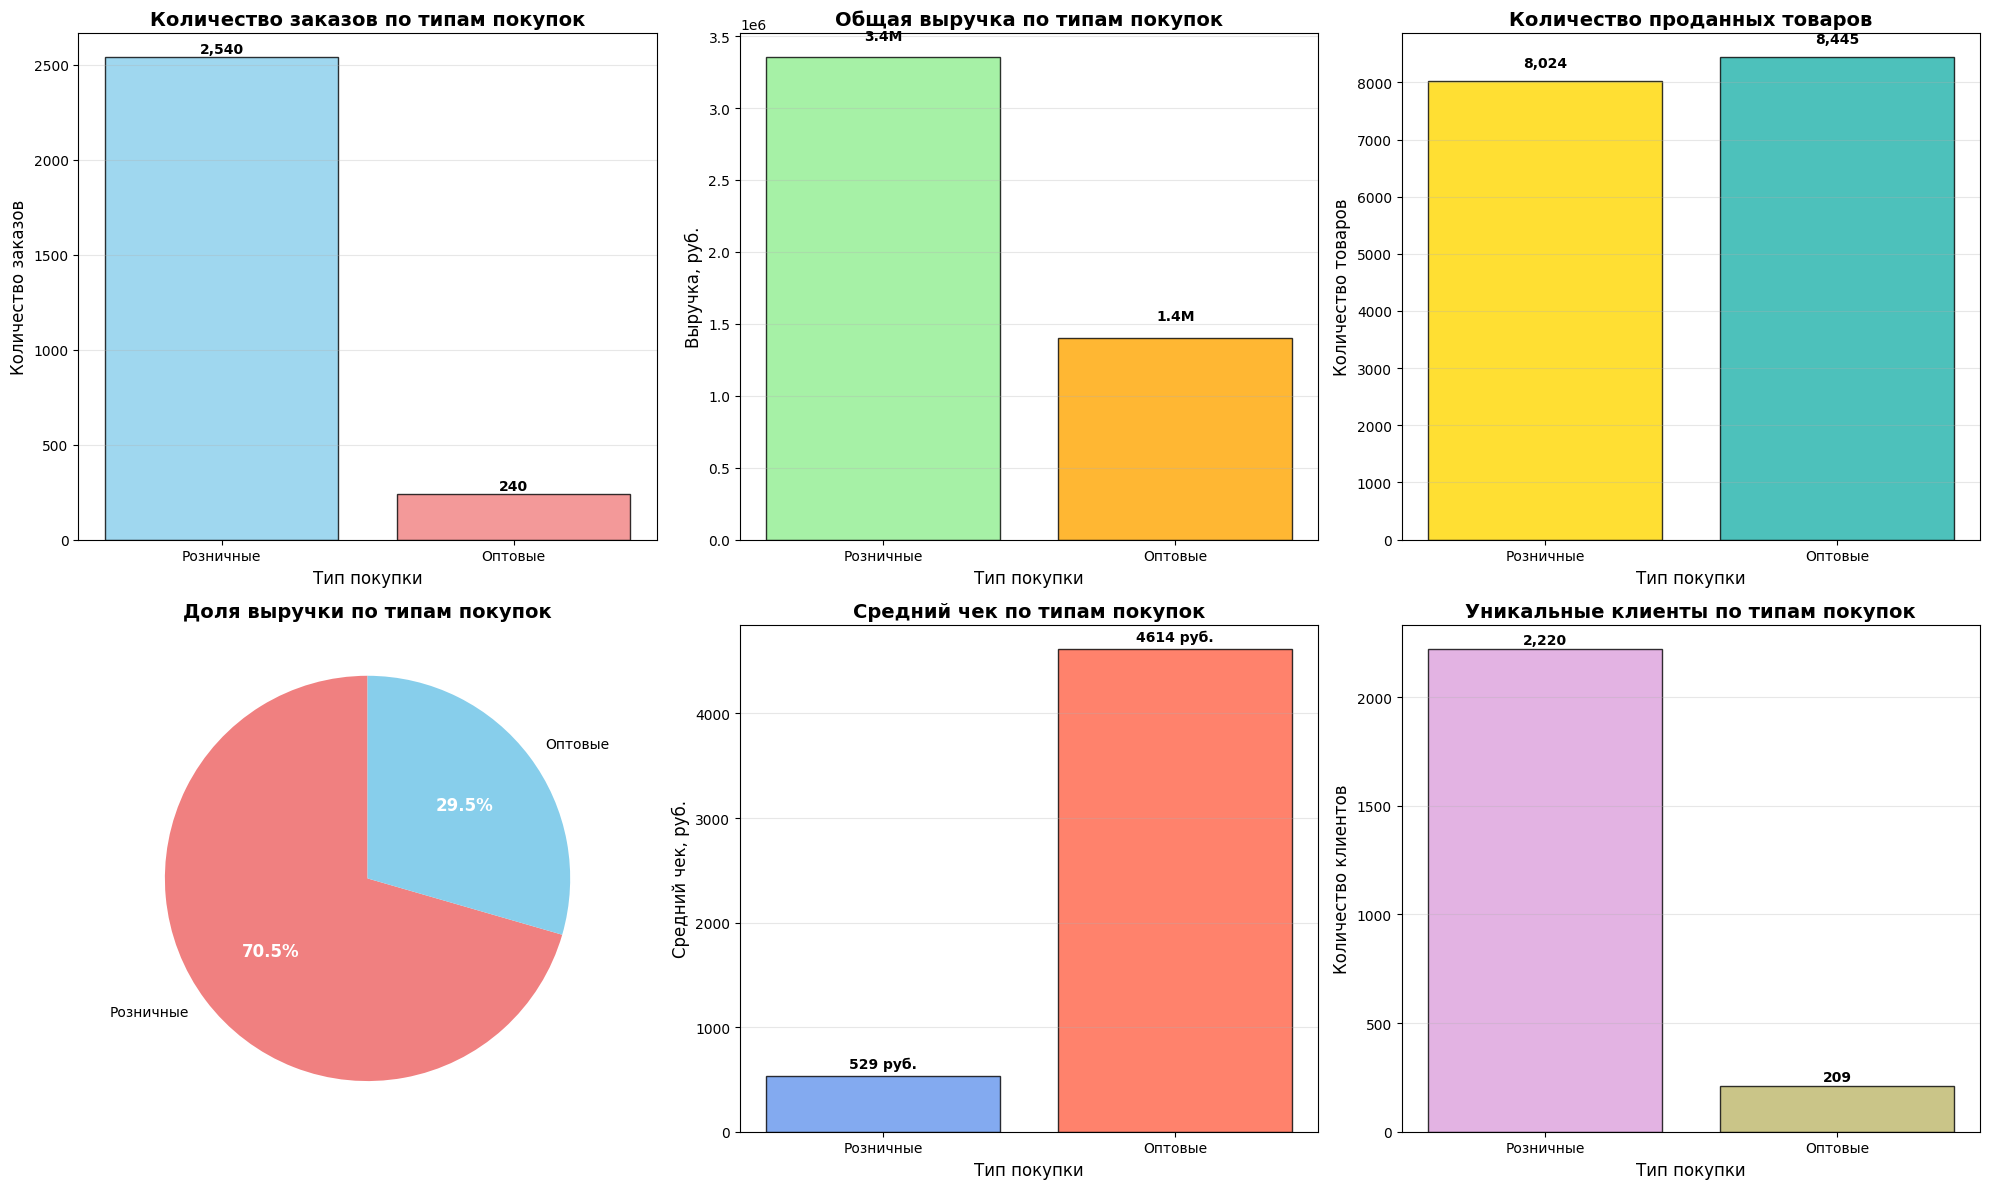

In [185]:

wholesale_vis = df.groupby('wholesale_flag').agg({
    'order_id': 'nunique',
    'revenue': 'sum',
    'quantity': 'sum',
    'customer_id': 'nunique'
}).reset_index()

wholesale_vis.columns = ['wholesale_flag', 'количество_заказов', 'общая_выручка', 'общее_количество', 'уникальные_клиенты']


labels = {True: 'Оптовые', False: 'Розничные'}
wholesale_vis['тип_покупки'] = wholesale_vis['wholesale_flag'].map(labels)

plt.figure(figsize=(20, 12))

# 1. Количество заказов
plt.subplot(2, 3, 1)
bars = plt.bar(wholesale_vis['тип_покупки'], wholesale_vis['количество_заказов'], 
               color=['skyblue', 'lightcoral'], alpha=0.8, edgecolor='black')
plt.title('Количество заказов по типам покупок', fontsize=14, fontweight='bold')
plt.xlabel('Тип покупки', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

# 2. Общая выручка
plt.subplot(2, 3, 2)
bars = plt.bar(wholesale_vis['тип_покупки'], wholesale_vis['общая_выручка'], 
               color=['lightgreen', 'orange'], alpha=0.8, edgecolor='black')
plt.title('Общая выручка по типам покупок', fontsize=14, fontweight='bold')
plt.xlabel('Тип покупки', fontsize=12)
plt.ylabel('Выручка, руб.', fontsize=12)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100000,
             f'{height/1000000:.1f}M', ha='center', va='bottom', fontweight='bold')

# 3. Количество проданных товаров
plt.subplot(2, 3, 3)
bars = plt.bar(wholesale_vis['тип_покупки'], wholesale_vis['общее_количество'], 
               color=['gold', 'lightseagreen'], alpha=0.8, edgecolor='black')
plt.title('Количество проданных товаров', fontsize=14, fontweight='bold')
plt.xlabel('Тип покупки', fontsize=12)
plt.ylabel('Количество товаров', fontsize=12)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 200,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

# 4. Доля выручки (круговая диаграмма)
plt.subplot(2, 3, 4)
sizes = wholesale_vis['общая_выручка']
colors = ['lightcoral', 'skyblue']
wedges, texts, autotexts = plt.pie(sizes, labels=wholesale_vis['тип_покупки'], 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Доля выручки по типам покупок', fontsize=14, fontweight='bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

# 5. Средний чек
avg_check = df.groupby('wholesale_flag')['revenue'].mean().reset_index()
avg_check['тип_покупки'] = avg_check['wholesale_flag'].map(labels)

plt.subplot(2, 3, 5)
bars = plt.bar(avg_check['тип_покупки'], avg_check['revenue'], 
               color=['cornflowerblue', 'tomato'], alpha=0.8, edgecolor='black')
plt.title('Средний чек по типам покупок', fontsize=14, fontweight='bold')
plt.xlabel('Тип покупки', fontsize=12)
plt.ylabel('Средний чек, руб.', fontsize=12)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{height:.0f} руб.', ha='center', va='bottom', fontweight='bold')

# 6. Количество уникальных клиентов
plt.subplot(2, 3, 6)
bars = plt.bar(wholesale_vis['тип_покупки'], wholesale_vis['уникальные_клиенты'], 
               color=['plum', 'darkkhaki'], alpha=0.8, edgecolor='black')
plt.title('Уникальные клиенты по типам покупок', fontsize=14, fontweight='bold')
plt.xlabel('Тип покупки', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [186]:
daily_stats = df.groupby('date_only').agg({
    'order_id': 'nunique',
    'revenue': 'sum',
    'quantity': 'sum'
}).reset_index()

print("Статистика по дням:")
print(daily_stats)

Статистика по дням:
      date_only  order_id  revenue  quantity
0    2018-10-01        11  13934.0       124
1    2018-10-02        15  26643.0        86
2    2018-10-03         8  10574.0        20
3    2018-10-04        11  26579.0        64
4    2018-10-05         7   4720.0        26
..          ...       ...      ...       ...
389  2019-10-27         3    998.0        10
390  2019-10-28         8   9072.0       110
391  2019-10-29         3    642.0         3
392  2019-10-30        12   7809.0        18
393  2019-10-31         8   4367.0         9

[394 rows x 4 columns]


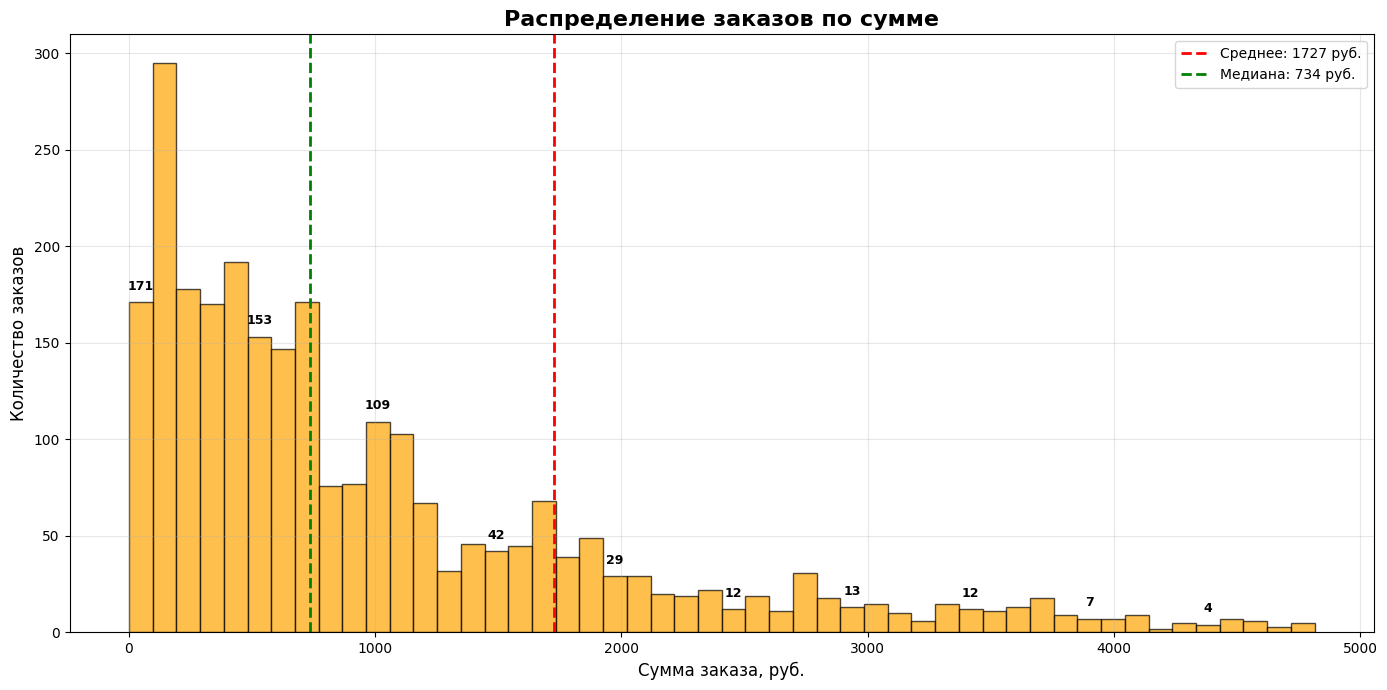

СТАТИСТИКА РАСПРЕДЕЛЕНИЯ:
Всего заказов: 2 755
Общая выручка: 4 757 602 руб.
Средний чек: 1727 руб.
Медианный чек: 734 руб.
Минимальный чек: 14 руб.
Максимальный чек: 675 000 руб.


In [187]:

order_level = df.groupby('order_id').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'date_only': 'first'
}).reset_index()

plt.figure(figsize=(14, 7))

# Гистограмма распределения заказов по сумме
n, bins, patches = plt.hist(order_level['revenue'], bins=50, 
                           alpha=0.7, color='orange', edgecolor='black',
                           range=(0, order_level['revenue'].quantile(0.95)))  # ограничиваем 95% перцентилем

plt.title('Распределение заказов по сумме', fontsize=16, fontweight='bold')
plt.xlabel('Сумма заказа, руб.', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.grid(alpha=0.3)


mean_val = order_level['revenue'].mean()
median_val = order_level['revenue'].median()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.0f} руб.')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.0f} руб.')


for i in range(0, len(n), 5):
    if n[i] > 0:  
        plt.text(bins[i] + (bins[i+1] - bins[i])/2, n[i] + 5, 
                f'{int(n[i])}', ha='center', va='bottom', 
                fontweight='bold', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()


print("СТАТИСТИКА РАСПРЕДЕЛЕНИЯ:")
print("=" * 40)
print(f"Всего заказов: {len(order_level):,}".replace(',', ' '))
print(f"Общая выручка: {order_level['revenue'].sum():,.0f} руб.".replace(',', ' '))
print(f"Средний чек: {order_level['revenue'].mean():.0f} руб.")
print(f"Медианный чек: {order_level['revenue'].median():.0f} руб.")
print(f"Минимальный чек: {order_level['revenue'].min():.0f} руб.")
print(f"Максимальный чек: {order_level['revenue'].max():,.0f} руб.".replace(',', ' '))

In [188]:
# Анализ перцентилей
print("\nПЕРЦЕНТИЛИ СУММ ЗАКАЗОВ:")
print("=" * 40)
percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
for p in percentiles:
    value = order_level['revenue'].quantile(p)
    print(f"{p*100:.0f}% заказов: ≤ {value:,.0f} руб.".replace(',', ' '))


ПЕРЦЕНТИЛИ СУММ ЗАКАЗОВ:
1% заказов: ≤ 44 руб.
5% заказов: ≤ 74 руб.
25% заказов: ≤ 300 руб.
50% заказов: ≤ 734 руб.
75% заказов: ≤ 1 612 руб.
90% заказов: ≤ 3 214 руб.
95% заказов: ≤ 4 815 руб.
99% заказов: ≤ 11 247 руб.


ТОП-10 ТОВАРОВ ПО ВЫРУЧКЕ:
                                                     выручка  \
product                                                        
Вантуз с деревянной ручкой d14 см красный, Burs...  675000.0   
Сумка-тележка 2-х колесная Gimi Argo красная         76090.0   
Сумка-тележка 2-х колесная Gimi Argo синяя           65281.0   
Простынь вафельная 200х180 см WELLNESS RW180-01...   53232.0   
Вешалки мягкие для деликатных вещей 3 шт шоколад     49596.0   
Тележка багажная DELTA ТБР-22 синий грузоподъем...   33992.0   
Сумка-тележка хозяйственная Andersen Scala Shop...   33294.0   
Муляж ЯБЛОКО 9 см красное                            32702.0   
Гладильная доска НИКА Гранд 122х42 см НГ             32382.0   
Набор ножей Attribute CHEF 5 предметов AKF522        29248.0   

                                                    количество_продаж  \
product                                                                 
Вантуз с деревянной ручкой d14 см красный, Burs...        

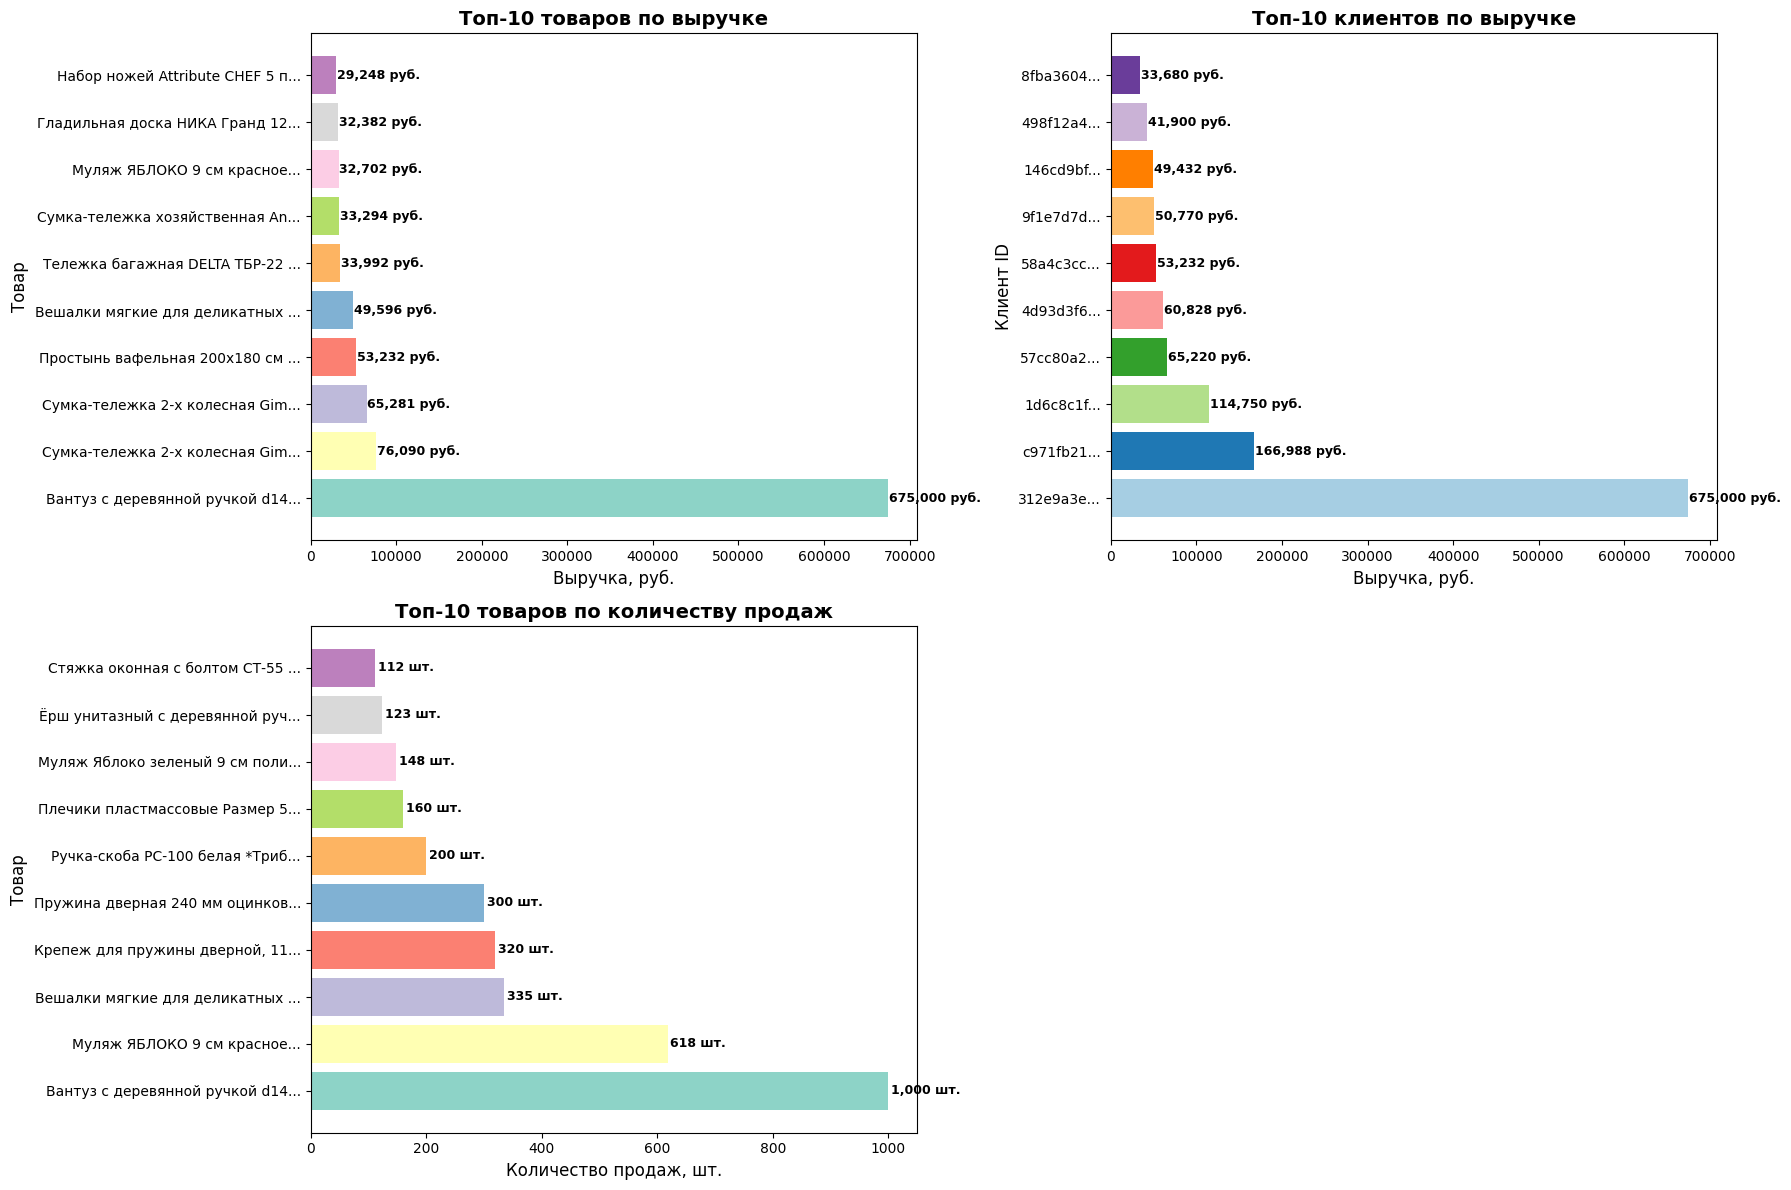


СТАТИСТИКА ПОКУПАТЕЛЬСКОГО ПОВЕДЕНИЯ:
          order_id        revenue     quantity      product
count  2394.000000    2394.000000  2394.000000  2394.000000
mean      1.150794    1987.302423     6.879282     1.951128
std       2.686314   14788.833386    35.612168     4.217216
min       1.000000      14.000000     1.000000     1.000000
25%       1.000000     329.000000     1.000000     1.000000
50%       1.000000     742.000000     1.000000     1.000000
75%       1.000000    1649.000000     4.000000     1.000000
max     126.000000  675000.000000  1000.000000   130.000000


In [189]:
top_products = df.groupby('product').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'order_id': 'nunique',
    'price': 'mean'
}).nlargest(10, 'revenue').round(2)

top_products = top_products.rename(columns={
    'revenue': 'выручка',
    'quantity': 'количество_продаж',
    'order_id': 'количество_заказов',
    'price': 'средняя_цена'
})

top_products['доля_выручки_%'] = (top_products['выручка'] / top_products['выручка'].sum() * 100).round(2)

print("ТОП-10 ТОВАРОВ ПО ВЫРУЧКЕ:")
print("="*50)
print(top_products)

# Топ-10 клиентов по выручке
top_customers = df.groupby('customer_id').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'order_id': 'nunique',
    'product': 'nunique'
}).nlargest(10, 'revenue').round(2)

top_customers = top_customers.rename(columns={
    'revenue': 'общая_выручка',
    'quantity': 'количество_товаров',
    'order_id': 'количество_заказов',
    'product': 'уникальных_товаров'
})

top_customers['средний_чек'] = top_customers['общая_выручка'] / top_customers['количество_заказов']
top_customers['доля_выручки_%'] = (top_customers['общая_выручка'] / top_customers['общая_выручка'].sum() * 100).round(2)

print("\nТОП-10 КЛИЕНТОВ ПО ВЫРУЧКЕ:")
print("="*50)
print(top_customers)

plt.figure(figsize=(18, 12))

# Топ товаров по выручке
plt.subplot(2, 2, 1)
bars = plt.barh(range(len(top_products)), top_products['выручка'], 
                color=plt.cm.Set3(range(len(top_products))))
plt.title('Топ-10 товаров по выручке', fontsize=14, fontweight='bold')
plt.xlabel('Выручка, руб.', fontsize=12)
plt.ylabel('Товар', fontsize=12)
plt.yticks(range(len(top_products)), [str(x)[:30] + '...' for x in top_products.index])

for i, (idx, row) in enumerate(top_products.iterrows()):
    plt.text(row['выручка'] + 1000, i, f'{row["выручка"]:,.0f} руб.', 
             va='center', fontweight='bold', fontsize=9)

# Топ клиентов по выручке
plt.subplot(2, 2, 2)
bars = plt.barh(range(len(top_customers)), top_customers['общая_выручка'], 
                color=plt.cm.Paired(range(len(top_customers))))
plt.title('Топ-10 клиентов по выручке', fontsize=14, fontweight='bold')
plt.xlabel('Выручка, руб.', fontsize=12)
plt.ylabel('Клиент ID', fontsize=12)
plt.yticks(range(len(top_customers)), [str(x)[:8] + '...' for x in top_customers.index])

for i, (idx, row) in enumerate(top_customers.iterrows()):
    plt.text(row['общая_выручка'] + 1000, i, f'{row["общая_выручка"]:,.0f} руб.', 
             va='center', fontweight='bold', fontsize=9)

# Топ товаров по количеству продаж
plt.subplot(2, 2, 3)
top_products_qty = df.groupby('product')['quantity'].sum().nlargest(10)
bars = plt.barh(range(len(top_products_qty)), top_products_qty.values, 
                color=plt.cm.Set3(range(len(top_products_qty))))
plt.title('Топ-10 товаров по количеству продаж', fontsize=14, fontweight='bold')
plt.xlabel('Количество продаж, шт.', fontsize=12)
plt.ylabel('Товар', fontsize=12)
plt.yticks(range(len(top_products_qty)), [str(x)[:30] + '...' for x in top_products_qty.index])

for i, (product, qty) in enumerate(top_products_qty.items()):
    plt.text(qty + 5, i, f'{qty:,} шт.', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


customer_behavior = df.groupby('customer_id').agg({
    'order_id': 'nunique',
    'revenue': 'sum',
    'quantity': 'sum',
    'product': 'nunique'
}).describe()

print("\nСТАТИСТИКА ПОКУПАТЕЛЬСКОГО ПОВЕДЕНИЯ:")
print("="*50)
print(customer_behavior)

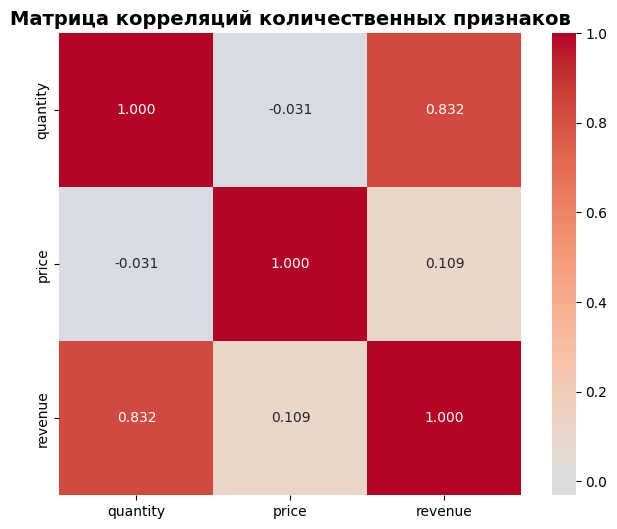

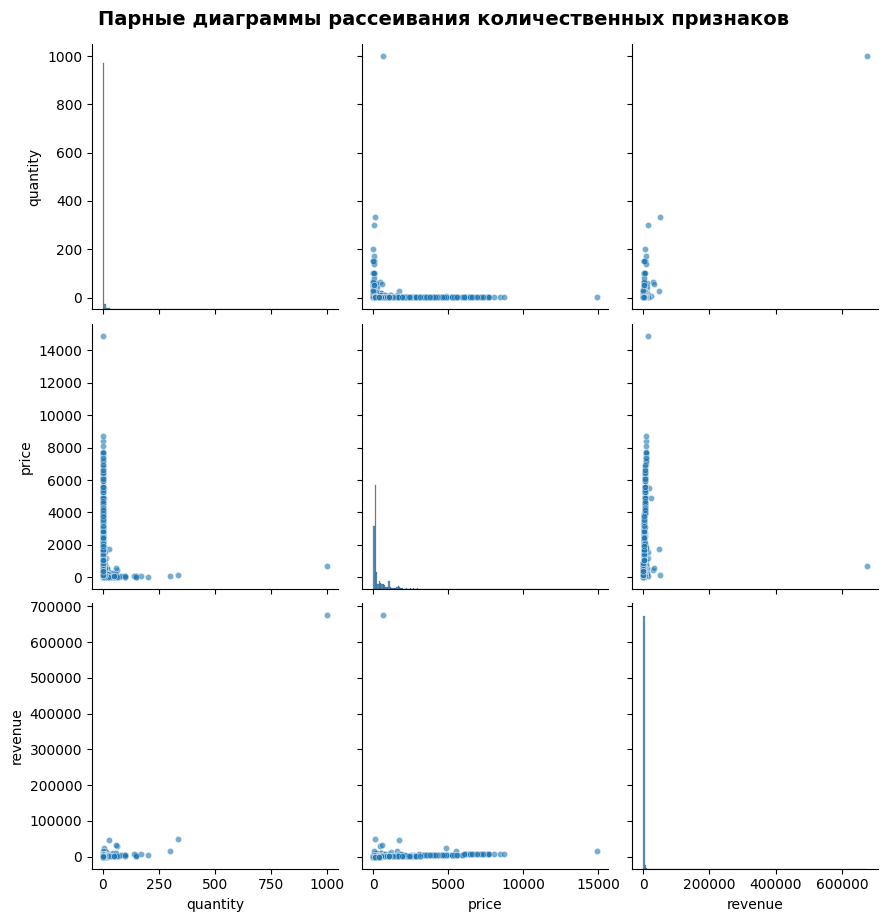

ПАРНЫЕ КОЭФФИЦИЕНТЫ КОРРЕЛЯЦИИ:
quantity ↔ price: -0.031
quantity ↔ revenue: 0.832
price ↔ revenue: 0.109


In [190]:
quantitative_traits = ['quantity', 'price', 'revenue']

# 2. Тепловая карта корреляций
plt.figure(figsize=(8, 6))
corr_matrix = df[quantitative_traits].corr()
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.3f',
            square=True)
plt.title('Матрица корреляций количественных признаков', fontsize=14, fontweight='bold')
plt.show()

# 3. Парные диаграммы рассеивания 
sns.pairplot(df[quantitative_traits], 
             diag_kind='hist',
             plot_kws={'alpha': 0.6, 's': 20},
             height=3)
plt.suptitle('Парные диаграммы рассеивания количественных признаков', 
             y=1.02, fontsize=14, fontweight='bold')
plt.show()


print("ПАРНЫЕ КОЭФФИЦИЕНТЫ КОРРЕЛЯЦИИ:")
print("=" * 40)
for i, trait1 in enumerate(quantitative_traits):
    for j, trait2 in enumerate(quantitative_traits):
        if i < j:  # Чтобы не дублировать
            corr = df[trait1].corr(df[trait2])
            print(f"{trait1} ↔ {trait2}: {corr:.3f}")

КОРРЕЛЯЦИИ ДЛЯ ОПТОВЫХ И РОЗНИЧНЫХ ПОКУПОК:


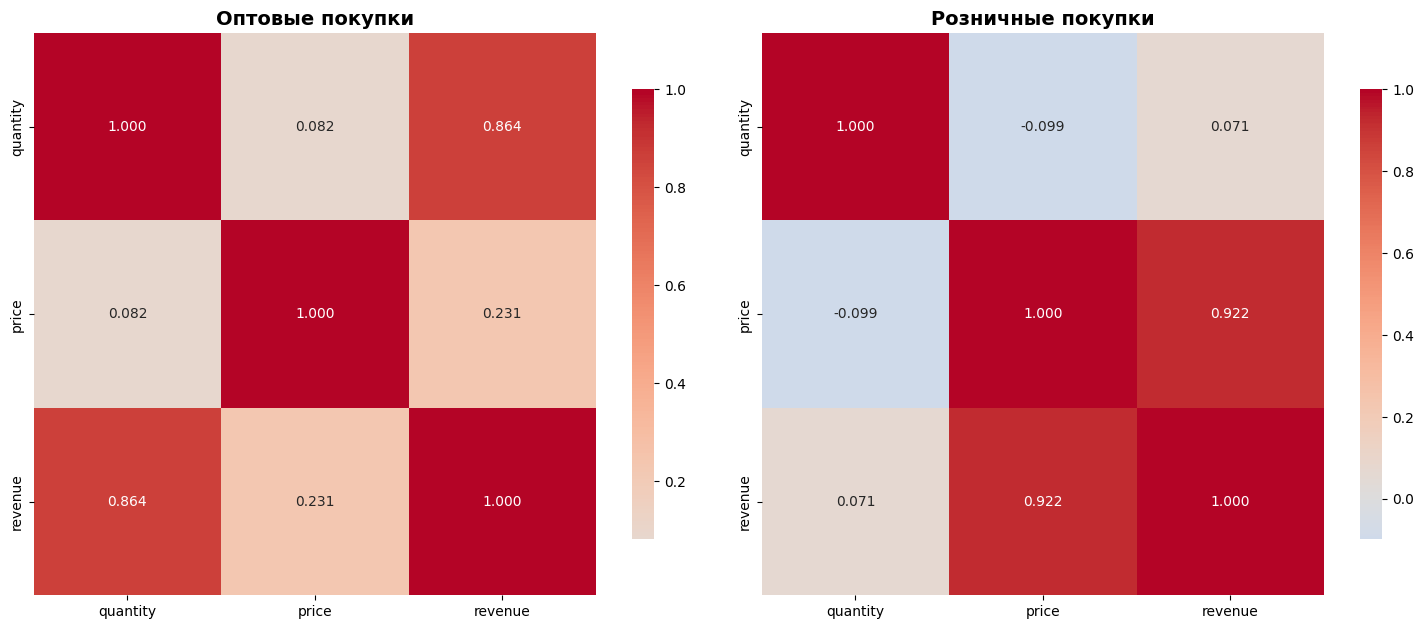

КОРРЕЛЯЦИИ ПО ЦЕНОВЫМ СЕГМЕНТАМ:


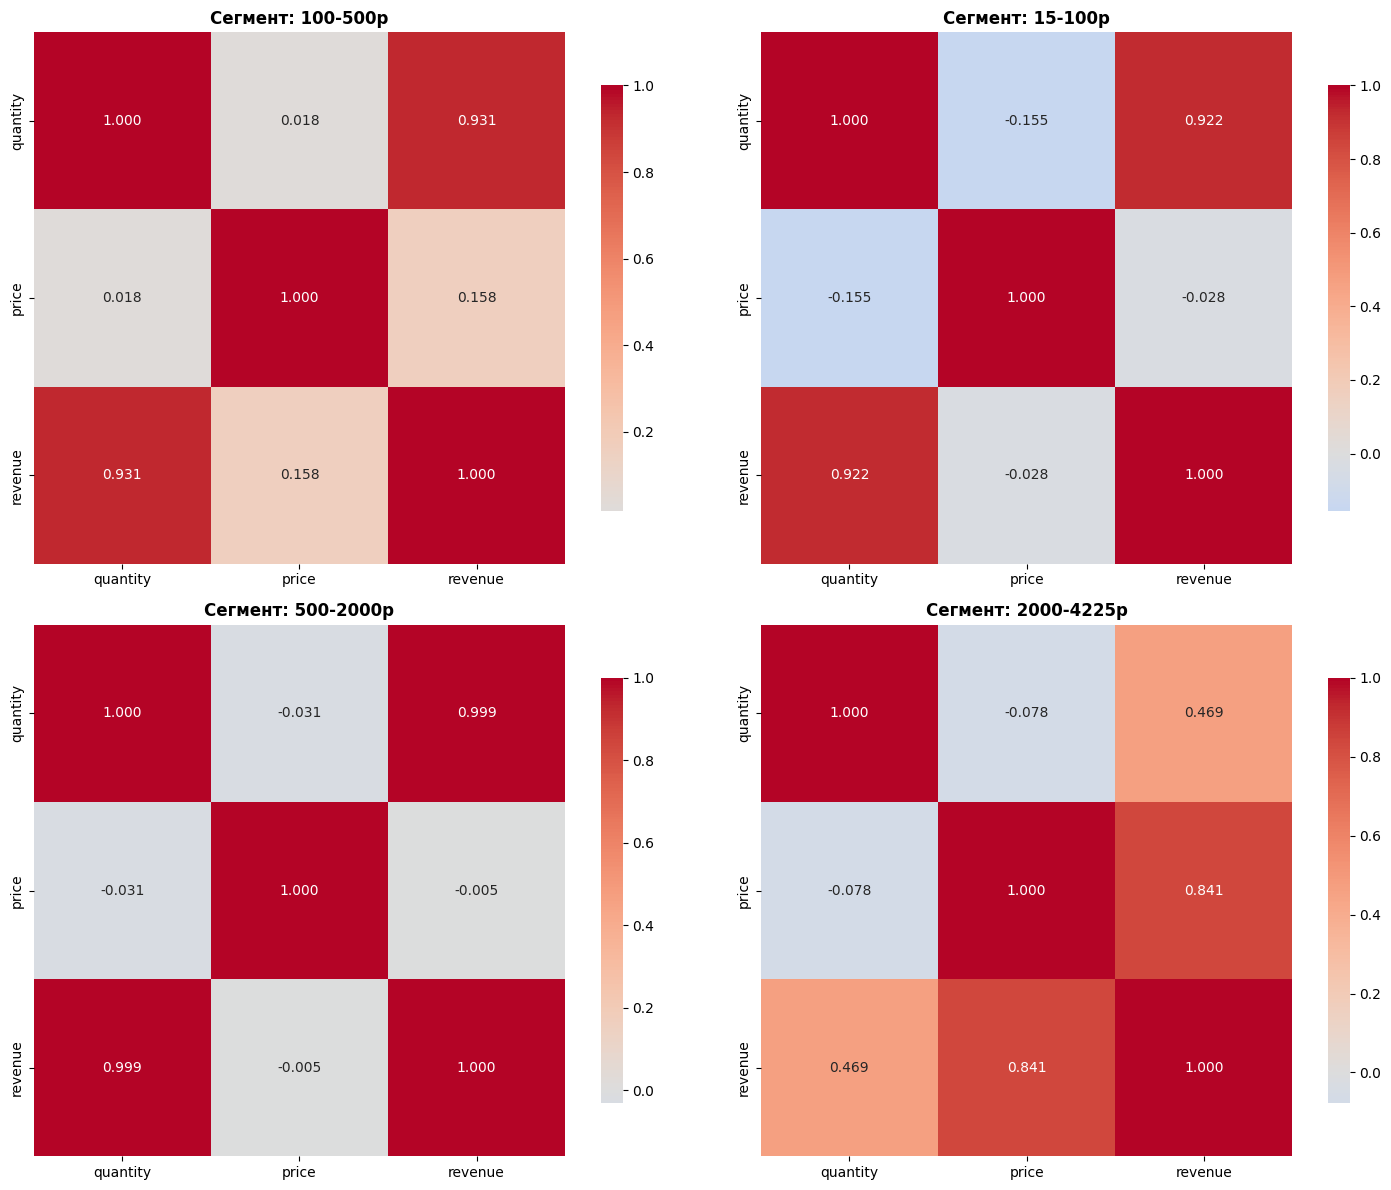

КОРРЕЛЯЦИИ НА УРОВНЕ ЗАКАЗОВ:


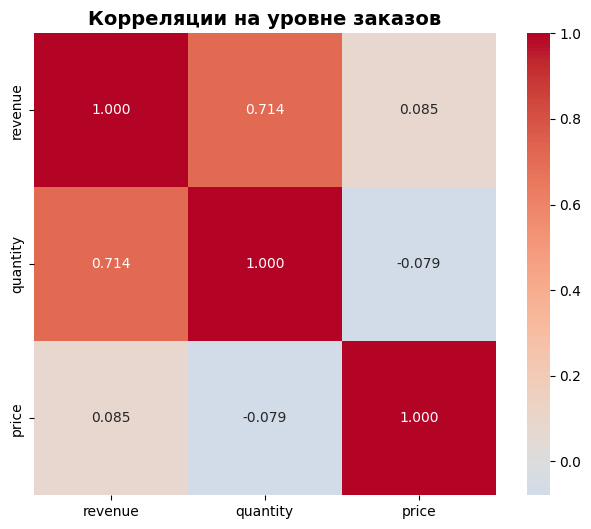

ДЕТАЛЬНАЯ ТАБЛИЦА КОРРЕЛЯЦИЙ ПО СРЕЗАМ:
              segment  quantity_price  quantity_revenue  price_revenue
0          Все данные          -0.031             0.832          0.109
1             Оптовые           0.082             0.864          0.231
2           Розничные          -0.099             0.071          0.922
3   Сегмент: 100-500р           0.018             0.931          0.158
4    Сегмент: 15-100р          -0.155             0.922         -0.028
5  Сегмент: 500-2000р          -0.031             0.999         -0.005
6     Уровень заказов          -0.079             0.714          0.085


In [191]:
# 1. Корреляции для ОПТ vs РОЗНИЦА
print("КОРРЕЛЯЦИИ ДЛЯ ОПТОВЫХ И РОЗНИЧНЫХ ПОКУПОК:")
print("=" * 50)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, (flag, label) in enumerate([(True, 'Оптовые'), (False, 'Розничные')]):
    subset = df[df['wholesale_flag'] == flag]
    corr_matrix = subset[quantitative_traits].corr()
    
    sns.heatmap(corr_matrix, ax=axes[i], annot=True, cmap='coolwarm', center=0, 
                fmt='.3f', square=True, cbar_kws={'shrink': 0.8})
    axes[i].set_title(f'{label} покупки', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


print("КОРРЕЛЯЦИИ ПО ЦЕНОВЫМ СЕГМЕНТАМ:")
print("=" * 50)


top_segments = df['price_segment'].value_counts().head(4).index

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, segment in enumerate(top_segments):
    subset = df[df['price_segment'] == segment]
    if len(subset) > 10:  # Только если достаточно данных
        corr_matrix = subset[quantitative_traits].corr()
        
        sns.heatmap(corr_matrix, ax=axes[i], annot=True, cmap='coolwarm', center=0,
                    fmt='.3f', square=True, cbar_kws={'shrink': 0.8})
        axes[i].set_title(f'Сегмент: {segment}', fontsize=12, fontweight='bold')
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# 3. Корреляции на УРОВНЕ ЗАКАЗОВ
print("КОРРЕЛЯЦИИ НА УРОВНЕ ЗАКАЗОВ:")
print("=" * 50)


order_level = df.groupby('order_id').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'price': 'mean'
}).reset_index()

order_corr = order_level[['revenue', 'quantity', 'price']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(order_corr, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', square=True)
plt.title('Корреляции на уровне заказов', fontsize=14, fontweight='bold')
plt.show()


print("ДЕТАЛЬНАЯ ТАБЛИЦА КОРРЕЛЯЦИЙ ПО СРЕЗАМ:")
print("=" * 60)


def get_correlations(data, label):
    corr = data[quantitative_traits].corr()
    return {
        'segment': label,
        'quantity_price': corr.loc['quantity', 'price'],
        'quantity_revenue': corr.loc['quantity', 'revenue'],
        'price_revenue': corr.loc['price', 'revenue']
    }


results = []


results.append(get_correlations(df, 'Все данные'))


results.append(get_correlations(df[df['wholesale_flag'] == True], 'Оптовые'))
results.append(get_correlations(df[df['wholesale_flag'] == False], 'Розничные'))


for segment in df['price_segment'].value_counts().head(3).index:
    segment_data = df[df['price_segment'] == segment]
    if len(segment_data) > 10:
        results.append(get_correlations(segment_data, f'Сегмент: {segment}'))


results.append(get_correlations(order_level, 'Уровень заказов'))


corr_df = pd.DataFrame(results)
print(corr_df.round(3))

### Выводы 
- Краткое резюме
  - Период данных: **2018-10-01 — 2019-10-31**  
  - Уникальных заказов: **2 755**  
  - Уникальных клиентов: **2 394**  
  - Уникальных товаров: **2 331**  
  - Суммарная выручка: **4 757 602 руб.**

---

- Ключевые метрики
  - **Медианный чек (по заказам):** ≈ **734 руб.**  
  - **Перцентильная картина чеков:**  
    - 25% ≤ **300 руб.**  
    - 50% ≤ **734 руб.**  
    - 75% ≤ **1 612 руб.**  
    - 95% ≤ **4 815 руб.**  
    - 99% ≤ **11 247 руб.**  
  - Распределение выручки правостороннее: малое число крупных заказов формирует значительную долю оборота.

---

- Опт vs Розница
  - **Розница:** 2 540 заказов, выручка **3 355 003 руб.** (~70.5%), средний чек ≈ **529 руб.**  
  - **Опт:** 240 заказов, выручка **1 402 599 руб.** (~29.5%), средний чек ≈ **4 614 руб.**  
  - Вывод: **оптовые заказы составляют всего ~8.7% по числу, но дают почти треть всей выручки.**

---

- Ценовые сегменты
(учитываются заказы, содержащие хотя бы один товар из сегмента)  
  - `<15 руб.`: 20 заказов, 1 310 руб. (≈0%)  
  - `15–100 руб.`: 588 заказов, 371 350 руб. (≈7.8%)  
  - `100–500 руб.`: 1 188 заказов, 1 066 202 руб. (≈22.4%)  
  - `500–2000 руб.`: 897 заказов, 2 189 896 руб. (≈46.0%)  
  - `2000–4225 руб.`: 193 заказа, 690 427 руб. (≈14.5%)  
  - `>4225 руб.`: 64 заказа, 438 417 руб. (≈9.2%)  

- Основной драйвер выручки — сегмент **500–2000 руб.**

---

- Поведение клиентов
  - **75% клиентов сделали только 1 заказ** — база преимущественно одноразовая.  
  - Максимум заказов у одного клиента — **126**.  


---

- Корреляции
  - В целом: `quantity ↔ revenue` ≈ **0.83** (сильная связь).  
  - В рознице: `price ↔ revenue` ≈ **0.92** — цена сильнее влияет на оборот.  
  - В опте: `quantity ↔ revenue` ≈ **0.86** — ключевую роль играет объём закупки.  


---
- Выводы простыми словами
  - В наборе данных **2 755 заказов**, **2 394 клиента**, период: **2018-10-01 — 2019-10-31**.  
  - Общая выручка составила **4.76 млн руб.**  

  - **Распределение чеков** сильно правостороннее: медианный чек ≈ **734 руб.**, но отдельные крупные заказы достигают более **11 тыс. руб.**  

  - **Розница** даёт около **70% выручки** при большом числе мелких заказов (средний чек ≈ 529 руб.),  
  а **опт** приносит почти **30% выручки** при всего ~9% заказов (средний чек ≈ 4 614 руб.).  

  - Основной вклад в выручку обеспечивает сегмент товаров **500–2000 руб.** (около 46%).  

  - Большинство клиентов совершают только **одну покупку**; есть единичные очень активные клиенты и крупные заказы, которые формируют значительную долю оборота.  

  - В рознице на выручку сильнее влияет **цена**, а в опте — **количество товара**.  





# Создание и анализ категорий товаров

Проанализировав названия, можно выделить следующие основные категории:

Растения, текстиль, хозтовары, аксессуары для ванной комнаты, инструменты и аксессуары, бытовая химия,мебель, крепеж и фурнитура, бытовые приборы, сумки, посуда, бытовая химия и тд.




In [192]:
categories = {
    'инструменты и аксессуары': {
        'основной ассортимент': [
            'сварка',
            'термометр',
            'набор инструментов',
            'инструмент',
            'напильников',
            'штангенциркуль',
        ],
        'вспомогательный ассортимент': [
            'угольник',
            'сверел',
            'сверло-фреза',
            'линейка',
            'паста для полировки',
            'ГОИ',
            'шило',
            'петля',
            'рассекатель',
            'сверло',
            'фиксатор-шар',
            'строительный',
        ],
    },
    'аксессуары для ванной комнаты': {
        'основной ассортимент': [
            'дозатор для мыла',
            'дозатор для мыла',
            'штанга для ванной',
            'карниз для ванной',
            'подголовник',
            'держатель для туалетной бумаги',
            'вантуз',
            'комплект для ванной',
        ],
        'вспомогательный ассортимент': [
            'пробка для ванны',
            'мыльница',
        ],
    },
    'мебель, крепеж и фурнитура': {
        'основной ассортимент': [
            'полка',
            'полки',
            'сиденье',
            'стеллаж',
            'этажерка',
            'подставка для цветов',
            'комод',
            'пуф',
            'подставка для обуви',
            'обувница',
        ],
        'вспомогательный ассортимент': [
            'ручка мебельная',
            'петля-стрела',
            'стяжка',
            'крепеж',
            'ручка-скоба',
            'завертка',
            'уголок оконный',
            'шпингалет',
            'пружина дверная',
            'ручка мебельная',
        ],
    },
    'бытовые приборы': {
        'основной ассортимент': [
            'миксер',
            'светильник',
            'электрический',
            'соковыжималка',
            'овощеварка',
            'фен',
            'утюг',
            'пылесос',
        ],
        'вспомогательный ассортимент': [
            'соковарка',
            'весы',
            'кипятильник',
        ],
    },
    'сумки': {
        'основной ассортимент': [
            'сумка',
            'рюкзак',
            'сумка-тележка',
        ],
        'вспомогательный ассортимент': [
            'мешок',
            'авоська',
        ],
    },
    'хозтовары': {
        'основной ассортимент': [
            'гладильная',
            'сушилка',
            'стремянка',
            'доски',
            'корзина',
            'тележка',
            'швабра',
            'швабр',
            'перчатки',
            'плечики',
            'урна',
            'стремянки',
            'вешалки',
            'вешалка',
            'вешалок',
            'ведро',
            'совок',
            'щетка',
            'решетка',
            'пьезозажигалка',
            'карниз',
            'бензин',
            'насадка-моп',
            'губка',
            'ролик',
            'крючок',
            'кольца для штор',
            'отжим',
            'Скребок',
            'насадка для мытья окон',
            'фал',
            'веник',
            'лестница-стремянка',
            'бак для белья',
            'тряпкодержатель',
            'сметка',
            'совок',
            'совком',
            'лопатка',
        ],
        'вспомогательный ассортимент': [
            'ерш',
            'ёрш',
            'чехол',
            'кофр',
            'подрукавник',
            'окномойка',
            'шнур',
            'шпагат',
            'прищепки',
            'набор прищепок',
            'сетка для стирки',
            'сетка для глажения',
            'чехол для гладильной доски',
        ],
    },
    'посуда': {
        'основной ассортимент': [
            'тарелка',
            'сковорода',
            'мини-сковорода',
            'чайник',
            'кастрюля',
            'котел',
            'сотейник',
            'противень',
            'форма',
            'форма для выпечки',
            'набор форм',
            'миска',
            'салатник',
            'бульонница',
            'кружка',
            'кружек',
            'стакан',
            'бокалов',
            'фужеров',
            'кувшин',
            'сахарница',
            'блюдо',
            'бидон',
            'термос',
            'термокружка',
            'хлебница',
            'чайный набор',
            'набор посуды',
        ],
        'вспомогательный ассортимент': [
            'крышка для сковороды',
            'крышка',
            'масленка',
            'блюдце',
            'тортница',
            'пищевой',
        ],
    },
    'текстиль': {
        'основной ассортимент': [
            'коврик',
            'ковер',
            'ковёр',
            'ковров',
            'полотенце',
            'плед',
            'простыня',
            'штора',
            'шторы',
            'подушка',
            'подушки',
            'ткань',
            'одеяло',
            'белье',
            'покрывало',
            'полотенец',
            'пододеяльник',
            'наволочка',
            'халат',
            'cкатерть',
            'простынь',
            'синтетического волокна',
        ],
        'вспомогательный ассортимент': [
            'наматрасник',
            'наматрацник',
            'салфеток',
            'салфетки',
            'салфетка',
            'тряпка',
        ],
    },
    'бытовая химия': {
        'основной ассортимент': [
            'порошок',
            'чистящий',
            'средство для удаления',
            'средство',
            'для мытья посуды',
            'ополаскиватель для посудомоечных машин',
            'кондиционер для белья',
            'гель для стирки',
        ],
        'вспомогательный ассортимент': [
            'антижир',
            'антинакипин',
            'защитная соль',
        ],
    },
    'кухонные аксессуары': {
        'основной ассортимент': [
            'терка',
            'овощечистка',
            'скалка',
            'венчик',
            'половник',
            'кисточка силиконовая',
            'пресс для чеснока',
            'орехоколка',
            'картофелемялка',
            'толкушка',
            'рыбочистка',
            'разделочная доска',
            'сито',
            'просеиватель',
            'просеиватель для муки',
            'измельчитель',
            'мантоварка',
            'весы электронные кухонные',
            'отделитель косточек',
            'подставка для яйца',
            'доска разделочная'
        ],
        'вспомогательный ассортимент': [
            'масленка',
            'салфетница',
            'электроштопор',
            'для хранения посуды',
            'шприц кондитерский '
        ],
    },
    'столовые приборы': {
        'основной ассортимент': [
            'вилка',
            'ложка',
            'нож',
            'набор столовых приборов',
        ],
        'вспомогательный ассортимент': [
            'нож'
        ],
    },
    'декор': {
        'основной ассортимент': [
            'муляж',
            'искусственная',
            'композиция',
            'декоративных',
            'фоторамка',
            'искусственный',
        ],
        'вспомогательный ассортимент': [
            'скатерть',
        ],
    },
    'растения, семена и горшки': {
        'основной ассортимент': [
            'растение',
            'орхидея',
            'фикус',
            'саженец',
            'радермахера',
            'xризолидокарпус',
            'циперус',
            'герань',
            'шеффлера',
            'рассада',
            'фуксия',
            'пеларгония',
            'флокс',
            'роза',
            'цикламен',
            'колокольчик',
            'декабрист',
            'кориандр',
            'петуния',
            'вербена',
            'клен',
            'хризантема',
            'бегония',
            'сельдерей',
            'огурец',
            'салат',
            'базилик',
            'петрушка',
            'томат',
            'укроп',
            'вигна',
            'лавр',
            'цинерария',
            'шалфей',
            'любисток',
            'табак',
            'капуста',
            'валериана',
            'змееголовник',
            'ромашка',
            'аквилегия',
            'анемона',
            'камнеломка',
            'лен',
            'бархатцы',
            'космея',
            'антуриум',
            'алиссум',
            'лаватера',
            'бакопа',
            'настурция',
            'лобелия',
            'морковь',
            'овсянница',
            'гвоздика',
            'калибрахоа',
            'годеция',
            'кореопсис',
            'лапчатка',
            'эшшольция',
            'ясколка',
            'физостегия',
            'вероника',
            'бадан',
            'гиностемма',
            'ель',
            'вербейник',
            'виноград',
            'котовник',
            'седум',
            'солидаго',
            'осина',
            'астра',
            'арбуз',
            'гайлардия',
            'монарда',
            'рудбекия',
            'кодонанта',
            'клубника',
            'дыня',
            'гипсофила',
            'примула',
            'пуансеттия',
            'горох',
            'земляника',
            'незабудка',
            'тимьян',
            'калла',
            'дендробиум',
            'георгина',
            'смолевка',
            'цинния',
            'эхинацея',
            'виола',
            'лилейник',
            'платикодон',
            'энотера',
            'цинния',
            'пиретрум',
            'маттиола',
            'юкка',
            'суккулент',
            'эхеверия',
            'эвкалипт',
            'фиалка',
            'каланхое',
            'литопс',
            'мимоза',
            'адиантум',
            'кампанула',
            'хлорофитум',
            'мирт',
            'мединилла',
            'калатея',
            'нолина',
            'глоксиния',
            'азалия',
            'афеляндра',
            'кипарисовик',
            'гортензия',
            'тюльпан',
            'ранункулус',
            'хоста',
            'барвинок',
            'хризолидокарпус',
            'иссоп',
            'алоэ',
            'альбука',
            'амариллис',
            'аптения',
            'артемизия',
            'аспарагус',
            'баклажан',
            'бальзамин',
            'буддлея',
            'гардения',
            'гербера',
            'гиацинт',
            'гимнокалициум',
            'джункус',
            'драцена',
            'душица',
            'замиокулькас',
            'импатиенс',
            'иссоп',
            'кабачок',
            'каллуна',
            'капсикум',
            'кофе',
            'крассула',
            'крокусы',
            'лаванда',
            'лантана',
            'мелисса',
            'молодило',
            'муррайя',
            'мускари',
            'мята',
            'нефролепис',
            'патиссон',
            'пахира',
            'пеперомия',
            'подсолнечник',
            'пуансетия',
            'розмарин',
            'сантолина',
            'скиммия',
            'соланум',
            'спатифиллум',
            'сциндапсус',
            'тыква',
            'фатсия',
            'фиттония',
            'хамедорея',
            'хризолидокарпус',
            'цитрофортунелла',
            'чабер',
            'эхинокактус',
            'травы',
            'эпипремнум',
        ],
        'вспомогательный ассортимент': [
            'подвесное кашпо',
            'ваза',
        ],
    },
    'личная гигиена': {
        'основной ассортимент': [
            'мыло',
            'пена',
        ],
        'вспомогательный ассортимент': [
            'паста зубная',
            'зубная паста',
        ],
    },
    'ёмкости': {
        'основной ассортимент': [
            'контейнер',
            'бутылка',
            'таз',
            'ящик',
            'коробка',
            'корыто',
            'корзинка',
            'ванна',
            'емкость',
        ],
        'вспомогательный ассортимент': [
            'ковш',
            'лоток',
            'банка',
        ],
    },
}


In [193]:
def _norm(s):
    return str(s).lower().replace('ё', 'е')

def classify_cat_sub(item):
    text = _norm(item)
    for cat, subcats in categories.items():
        for subcat, keywords in subcats.items():
            if any(_norm(kw) in text for kw in keywords):
                return cat, subcat
    return "прочее", "прочее"

df[["category", "subcategory"]] = (
    df["product"].apply(lambda x: pd.Series(classify_cat_sub(x)))
)

C:\Users\Администратор\AppData\Local\Temp\ipykernel_15252\66936896.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["category", "subcategory"]] = (
C:\Users\Администратор\AppData\Local\Temp\ipykernel_15252\66936896.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["category", "subcategory"]] = (


In [194]:
dfcat = df.copy()
dfcat.to_csv('DF_CATEGORY.csv', index=False)

Анализ по категориям:
                                 revenue  total_orders  unique_products
category                                                               
хозтовары                      1326543.0           984              504
сумки                           803129.0           410               97
растения, семена и горшки       729153.0          3901              925
аксессуары для ванной комнаты   698339.0            46               22
текстиль                        428979.0           290              187
декор                           179985.0           342              156
посуда                          161942.0           265              180
мебель, крепеж и фурнитура      143814.0            80               40
ёмкости                         128896.0           109               63
столовые приборы                 53765.0            47               37
бытовые приборы                  31385.0            35               30
кухонные аксессуары              28074.0  

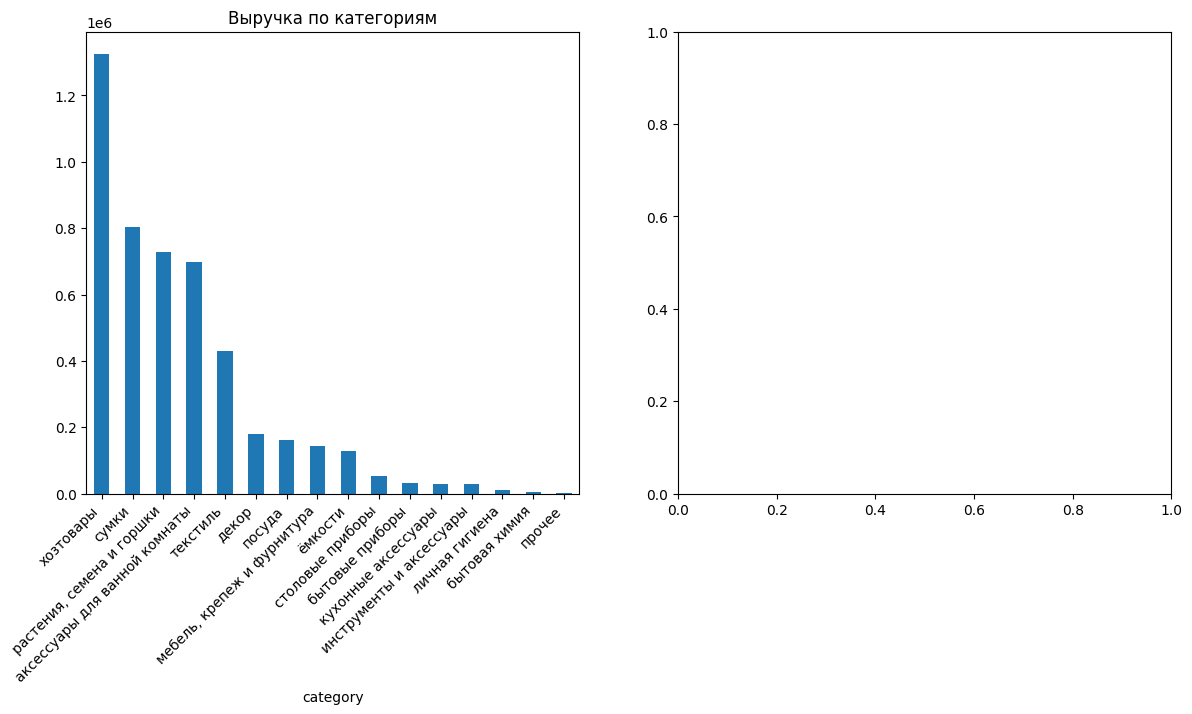

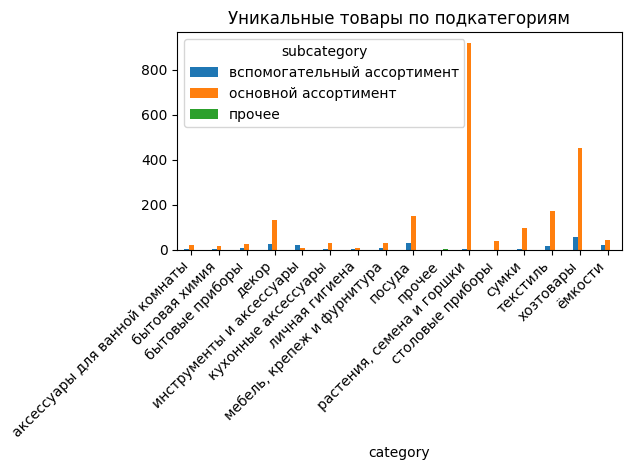


Дополнительная статистика:
Всего категорий: 16
Всего уникальных товаров: 2331
Общая выручка: 4757602.00 руб.


In [195]:
category_summary = df.groupby('category').agg({
    'revenue': 'sum',
    'order_id': 'count',
    'product': 'nunique'
}).rename(columns={
    'order_id': 'total_orders',
    'product': 'unique_products'
}).sort_values('revenue', ascending=False)

print("Анализ по категориям:")
print(category_summary)


subcategory_analysis = df.groupby(['category', 'subcategory']).agg({
    'revenue': 'sum',
    'product': 'nunique'
}).rename(columns={'product': 'unique_products'})

print("\nАнализ по подкатегориям:")
print(subcategory_analysis)


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
category_summary['revenue'].plot(kind='bar', title='Выручка по категориям')
plt.xticks(rotation=45, ha='right')


plt.subplot(1, 2, 2)
subcategory_analysis['unique_products'].unstack().plot(
    kind='bar', 
    title='Уникальные товары по подкатегориям'
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


print("\nДополнительная статистика:")
print(f"Всего категорий: {df['category'].nunique()}")
print(f"Всего уникальных товаров: {df['product'].nunique()}")
print(f"Общая выручка: {df['revenue'].sum():.2f} руб.")

C:\Users\Администратор\AppData\Local\Temp\ipykernel_15252\536994112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_only'] = pd.to_datetime(df['date_only'])


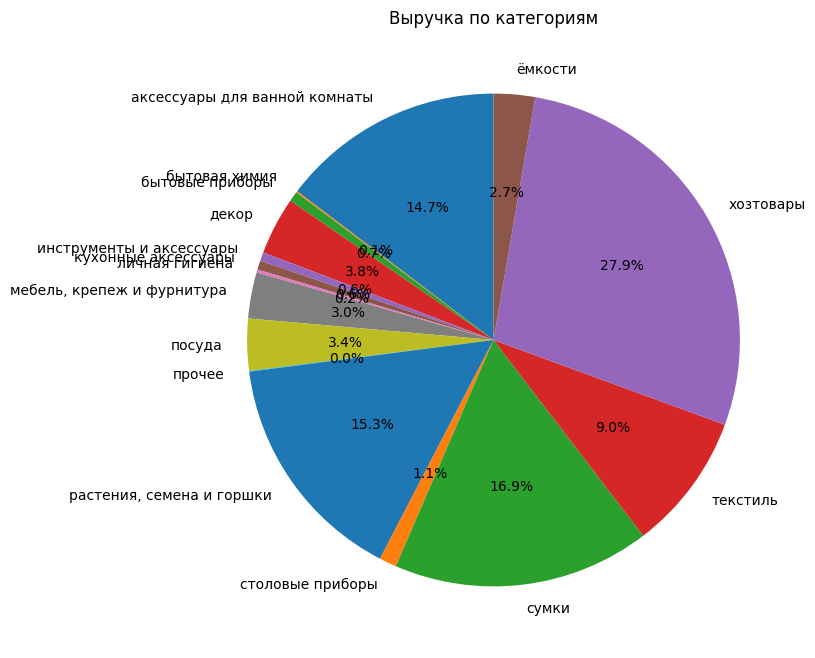

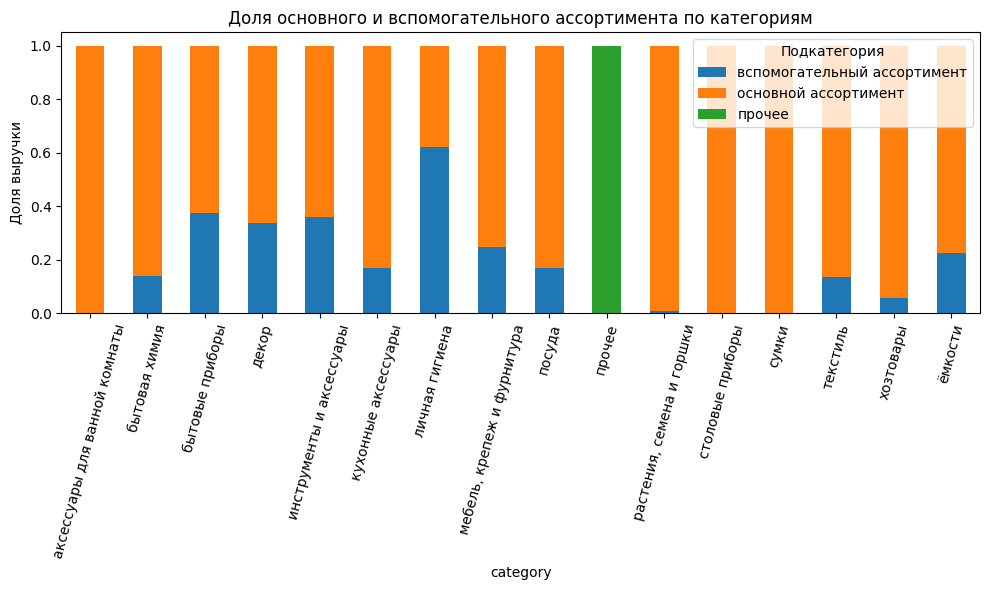

In [196]:
df['date_only'] = pd.to_datetime(df['date_only'])

# 1. Круговая диаграмма по выручке категорий
category_revenue = df.groupby('category')['revenue'].sum()
plt.figure(figsize=(8, 8))
plt.pie(category_revenue, labels=category_revenue.index, autopct='%1.1f%%', startangle=90)
plt.title('Выручка по категориям')
plt.show()

# 2. Столбчатая диаграмма по доле ассортимента
subcategory_revenue = df.groupby(['category', 'subcategory'])['revenue'].sum().unstack(fill_value=0)
subcategory_share = subcategory_revenue.div(subcategory_revenue.sum(axis=1), axis=0)
subcategory_share.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Доля основного и вспомогательного ассортимента по категориям')
plt.ylabel('Доля выручки')
plt.xticks(rotation=75)
plt.legend(title='Подкатегория')
plt.tight_layout()
plt.show()



In [197]:

filtered_df = df[(df['subcategory'] == 'основной ассортимент') & (df['wholesale_flag'] == False)]


median_check = filtered_df.groupby('category')['revenue'].median().reset_index()
median_check.columns = ['category', 'median_revenue']


median_check_sorted = median_check.sort_values(by='median_revenue', ascending=False)


top5 = median_check_sorted.head(5)

print(top5)

                      category  median_revenue
7   мебель, крепеж и фурнитура          1500.0
11                       сумки          1087.0
12                    текстиль           937.0
13                   хозтовары           787.0
2              бытовые приборы           689.0


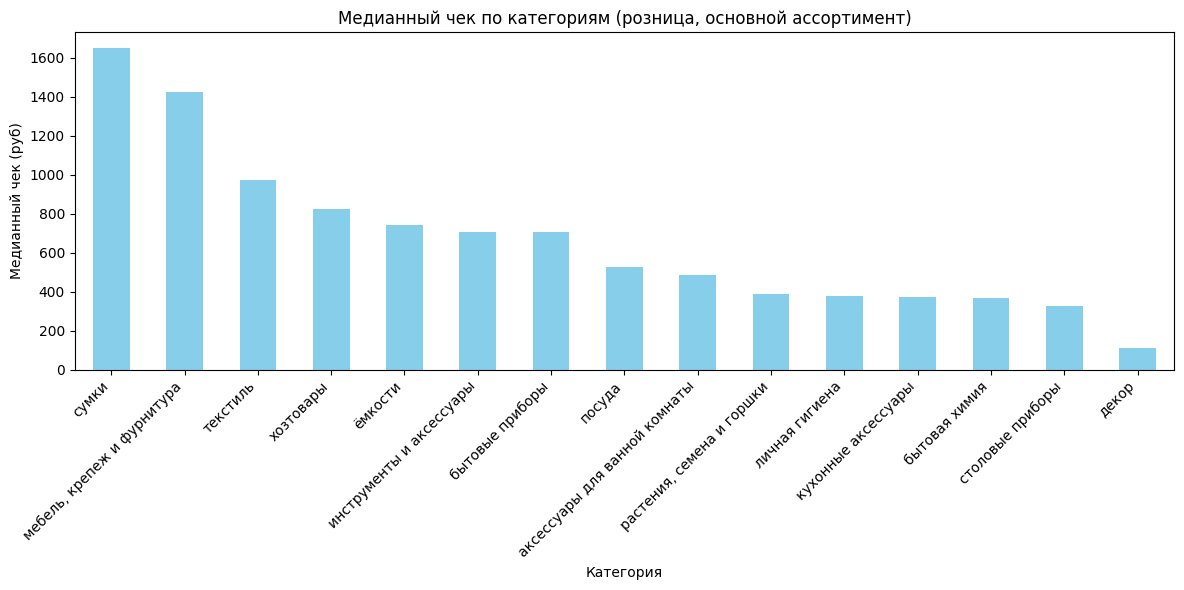

Топ-3 категории по медианному чеку:
category
сумки                         1649.0
мебель, крепеж и фурнитура    1425.0
текстиль                       974.0
Name: revenue, dtype: float64
Топ-3 худшие категории по медианному чеку:
category
бытовая химия       366.0
столовые приборы    328.0
декор               112.0
Name: revenue, dtype: float64


In [198]:
filtered_df = df[(df['wholesale_flag'] == False) & (df['subcategory'] == 'основной ассортимент')]


order_totals = filtered_df.groupby(['order_id', 'category']).agg({
    'revenue': 'sum'
}).reset_index()


median_check = order_totals.groupby('category')['revenue'].median().sort_values(ascending=False)


top3 = median_check.head(3)
bad_top3 = median_check.tail(3) 


plt.figure(figsize=(12, 6))
median_check.plot(kind='bar', color='skyblue')
plt.title('Медианный чек по категориям (розница, основной ассортимент)')
plt.xlabel('Категория')
plt.ylabel('Медианный чек (руб)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


print("Топ-3 категории по медианному чеку:")
print(top3)
print("Топ-3 худшие категории по медианному чеку:")
print(bad_top3)

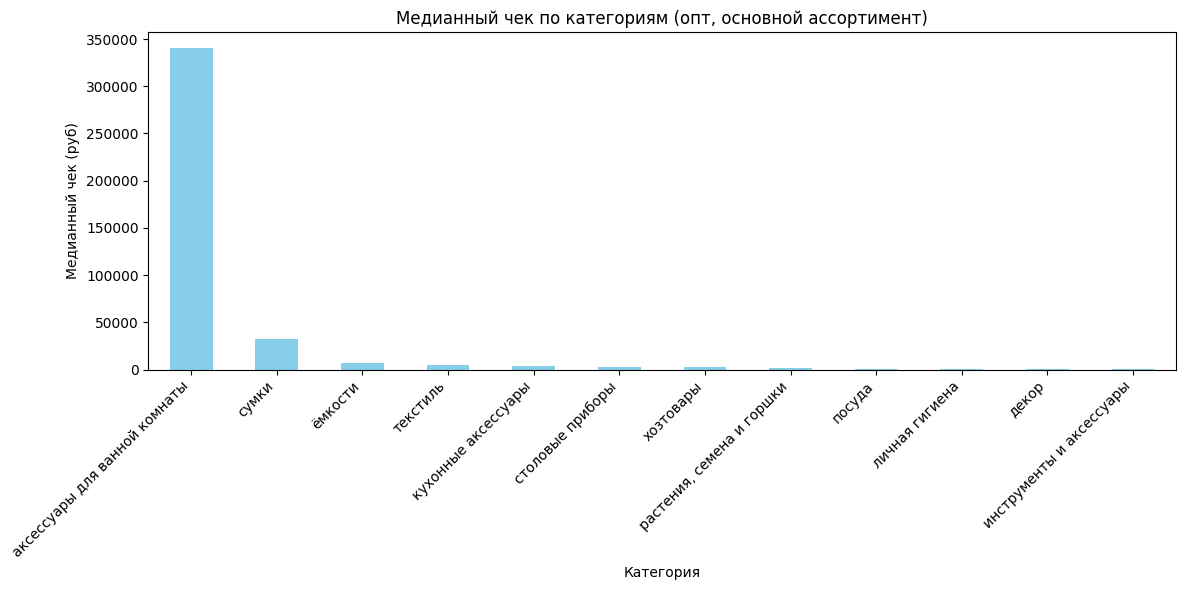

Топ-3 категории по медианному чеку:
category
аксессуары для ванной комнаты    340068.0
сумки                             32718.0
ёмкости                            6567.5
Name: revenue, dtype: float64


In [199]:
filtered_df_1 = df[(df['wholesale_flag'] == True) & (df['subcategory'] == 'основной ассортимент')]


order_totals_1 = filtered_df_1.groupby(['order_id', 'category']).agg({
    'revenue': 'sum'
}).reset_index()


median_check_1 = order_totals_1.groupby('category')['revenue'].median().sort_values(ascending=False)


top3_1 = median_check_1.head(3)


plt.figure(figsize=(12, 6))
median_check_1.plot(kind='bar', color='skyblue')
plt.title('Медианный чек по категориям (опт, основной ассортимент)')
plt.xlabel('Категория')
plt.ylabel('Медианный чек (руб)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


print("Топ-3 категории по медианному чеку:")
print(top3_1)

### Выводы:
- В данном разделе разделил все товары на категории. Из получившихся категорий выделил основной и дополнительный товар.
- Анализ по категориям:
    - Хозтовары - самая большая выручка
    - Растения, семена и горшки - большое разнообразие товаров, большое количество покупок
- Посчитал медианный чек для всех категорий и выделил топ 3. Взял медианный, а не средний так как он менее чувствителен к выбросам и лучше отражает типичный размер покупки

# Формулировка и проверка статистических гипотез


Разница между выборочными средними (медианными) значениями чеков по розничным заказам для категорий:

$H_0$ : Медианный чек в ТОП-3 категориях с самыми высокими значениями (сумки, мебель, крепеж и фурнитура, текстиль) не отличается от медианного чека в 3 категориях с самыми низкими значениями (личная гигиена, декор, инструменты и аксессуары).

$H_1$ : Медианный чек в категориях из "высокой" группы статистически значимо выше, чем в категориях из "низкой" группы

In [200]:

median_check_1 = filtered_df_1.groupby('category')['revenue'].median().sort_values(ascending=False)


top_categories = median_check_1.head(3).index.tolist()    
bottom_categories = median_check_1.tail(3).index.tolist() 

print("Категории с высоким чеком:", top_categories)
print("Категории с низким чеком:", bottom_categories)


df_top = filtered_df_1[filtered_df_1['category'].isin(top_categories)]
df_bottom = filtered_df_1[filtered_df_1['category'].isin(bottom_categories)]


x = df_top.groupby('order_id')['revenue'].sum()

y = df_bottom.groupby('order_id')['revenue'].sum()

alpha = 0.05
statist, p_valye = shapiro(x)
if p_valye < alpha:
    print(f"""Гипотезу H_0 о нормальном распределении x отвергаем.
Иными словами, распределение сл. величины x отлично от нормального.
p-value = {p_valye}""")
else:
    print(f"""Гипотезу H_0 о нормальном распределении x примимаем.
Иными словами, распределение сл. величины x нормальное.
p-value = {p_valye}""")
    
alpha = 0.05
statist, p_valye = shapiro(y)
if p_valye < alpha:
    print(f"""Гипотезу H_0 о нормальном распределении y отвергаем.
Иными словами, распределение сл. величины y отлично от нормального.
p-value = {p_valye}""")
else:
    print(f"""Гипотезу H_0 о нормальном распределении y примимаем.
Иными словами, распределение сл. величины y нормальное.
p-value = {p_valye}""")


from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(x, y, alternative='greater')

print(f"\nРезультаты сравнения EXTREMES:")
print(f"p-value: {p_value:.5f}")

alpha = 0.05
if p_value < alpha:
    print("ГИПОТЕЗА ПОДТВЕРЖДЕНА")
    print(f"Медианный чек в категориях {top_categories} значимо выше, чем в {bottom_categories}")
else:
    print("ГИПОТЕЗА НЕ ПОДТВЕРЖДЕНА")
    print("Статистически значимых различий не обнаружено.")

Категории с высоким чеком: ['аксессуары для ванной комнаты', 'сумки', 'ёмкости']
Категории с низким чеком: ['личная гигиена', 'декор', 'инструменты и аксессуары']
Гипотезу H_0 о нормальном распределении x отвергаем.
Иными словами, распределение сл. величины x отлично от нормального.
p-value = 1.1622202628307999e-05
Гипотезу H_0 о нормальном распределении y отвергаем.
Иными словами, распределение сл. величины y отлично от нормального.
p-value = 7.617108438820853e-16

Результаты сравнения EXTREMES:
p-value: 0.00004
ГИПОТЕЗА ПОДТВЕРЖДЕНА
Медианный чек в категориях ['аксессуары для ванной комнаты', 'сумки', 'ёмкости'] значимо выше, чем в ['личная гигиена', 'декор', 'инструменты и аксессуары']


### Выводы:
- Медианный чек в категориях ['аксессуары для ванной комнаты', 'сумки', 'ёмкости'] значимо выше, чем в ['личная гигиена', 'декор', 'инструменты и аксессуары']

# Аналитическая задача

Определить -- товары, которые можно предлагать как сопутствующие или располагать в прикассовой зоне.

Выделим топ-20% товаров розницы по частоте продаж (количеству проданных единиц) с ценой менее 500 рублей.

In [201]:
df_retail = df[df['wholesale_flag'] == False]


product_sales = df_retail.groupby('product').agg({
    'quantity': 'sum',
    'price': 'first',
    'category': 'first',
    'subcategory': 'first',
    'revenue': 'sum'
}).reset_index()


product_sales_sorted = product_sales.sort_values(by='quantity', ascending=False)


total_quantity = product_sales_sorted['quantity'].sum()
product_sales_sorted['cumulative_quantity'] = product_sales_sorted['quantity'].cumsum()
product_sales_sorted['percentage_of_total'] = (product_sales_sorted['cumulative_quantity'] / total_quantity) * 100


top_20_percent = product_sales_sorted[product_sales_sorted['percentage_of_total'] <= 20]


top_20_under_500 = top_20_percent[top_20_percent['price'] <= 500]


top_20_under_500_sorted = top_20_under_500.sort_values(by='quantity', ascending=False)

print("Топ-20% товаров по частоте продаж (РОЗНИЦА) с ценой ≤ 500 руб:")
print("=" * 80)
print(f"Всего товаров в выборке: {len(top_20_under_500_sorted)}")
print(f"Общее количество продаж этих товаров: {top_20_under_500_sorted['quantity'].sum()}")
print(f"Общая выручка от этих товаров: {top_20_under_500_sorted['revenue'].sum()} руб")
print("=" * 80)

for i, row in top_20_under_500_sorted.iterrows():
    print(f"{row['product']}")
    print(f"  Категория: {row['category']} | Подкатегория: {row['subcategory']}")
    print(f"  Цена: {row['price']} руб | Продано: {row['quantity']} шт")
    print(f"  Выручка: {row['revenue']} руб")
    print("-" * 80)

Топ-20% товаров по частоте продаж (РОЗНИЦА) с ценой ≤ 500 руб:
Всего товаров в выборке: 23
Общее количество продаж этих товаров: 1466
Общая выручка от этих товаров: 191433.0 руб
Рассада Кабачка сорт Зебра кассета 6 шт E6
  Категория: растения, семена и горшки | Подкатегория: основной ассортимент
  Цена: 120.0 руб | Продано: 82 шт
  Выручка: 9840.0 руб
--------------------------------------------------------------------------------
Рассада Кабачка сорт Белогор кассета 6 шт E6
  Категория: растения, семена и горшки | Подкатегория: основной ассортимент
  Цена: 120.0 руб | Продано: 80 шт
  Выручка: 9600.0 руб
--------------------------------------------------------------------------------
Тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт
  Категория: растения, семена и горшки | Подкатегория: основной ассортимент
  Цена: 210.0 руб | Продано: 79 шт
  Выручка: 16590.0 руб
--------------------------------------------------------------------------------
Рассада Кабачка сорт З

### Анализируя Топ-20% товаров по частоте продаж (РОЗНИЦА) с ценой ≤ 500 руб делаю следующие выводы:
- Товары, подходящие для предкассовой зоны основные:
    - Рассада, семена
    - Цветы в горшках
    - Я бы добавил сюда Муляжи фруктов, так как они отлично гармагируют с цветами и рассадой.
- Товары, подходящие для предкассовой зоны другие варинты:
    - Все категории по дополнительному ассортименту оптимально разместить в прикассовой зоне и рядом с соответствующими основными товарами.